# Florence-2-large sample usage

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install seaborn ncps torch pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image, ImageDraw, ImageFont
import requests
import copy
import torch
%matplotlib inline
from torch import nn
import time
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import os
import gc
import ncps
from ncps import wirings
from ncps.wirings import AutoNCP
from ncps.torch import LTC
import pytorch_lightning as pl
import torch.utils.data as data
from ultralytics import Drone
from transformers import BertModel, BertTokenizer
import pandas as pd
from torchvision import transforms
import torch.optim as optim
import glob

In [2]:
#!rm -rf Florence-2-base

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [4]:
prompt= "Fly towards tree"
task = "<OD>"
text = "<DETAILED_CAPTION>"

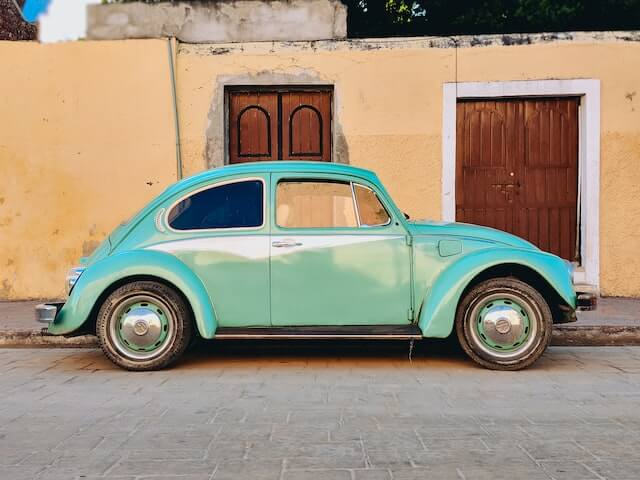

In [5]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)
image

In [6]:
from PIL import Image
import requests
import matplotlib.pyplot as plt

image_path = 'E:/ml/Florence-2-base/chair.png'

try:
  chair = Image.open(image_path)
  plt.imshow(chair)
  plt.axis('off')  # Hide axis ticks and labels
  plt.show()
  width, height = chair.size
  print(f"Image size: {width} x {height} pixels")
except FileNotFoundError:
  print(f"Error: Image file not found at {image_path}. Please check the path.")
except Exception as e:
  print(f"An error occurred: {e}")

Error: Image file not found at E:/ml/Florence-2-base/chair.png. Please check the path.


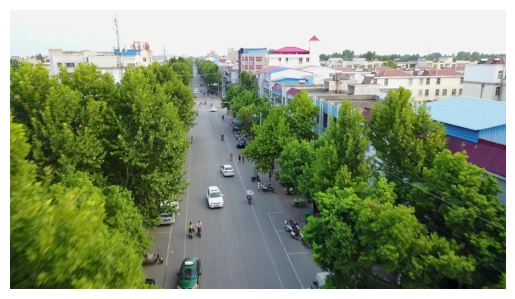

Image size: 1344 x 756 pixels


In [ ]:
image_path = 'E:/ml/Florence-2-base/vis_drone.jpg'

try:
  vis_drone = Image.open(image_path)
  plt.imshow(vis_drone)
  plt.axis('off')  # Hide axis ticks and labels
  plt.show()
  width, height = vis_drone.size
  print(f"Image size: {width} x {height} pixels")
except FileNotFoundError:
  print(f"Error: Image file not found at {image_path}. Please check the path.")
except Exception as e:
  print(f"An error occurred: {e}")

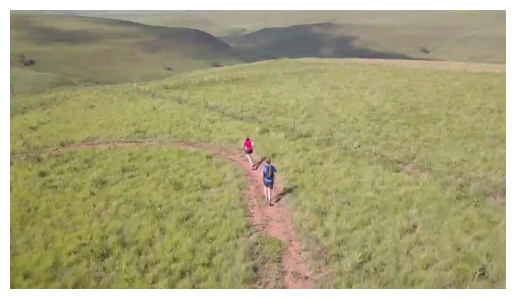

Image size: 1280 x 720 pixels


In [ ]:
image_path = 'E:/ml/Florence-2-base/field.jpg'

try:
  field = Image.open(image_path)
  plt.imshow(field)
  plt.axis('off')  # Hide axis ticks and labels
  plt.show()
  width, height = field.size
  print(f"Image size: {width} x {height} pixels")
except FileNotFoundError:
  print(f"Error: Image file not found at {image_path}. Please check the path.")
except Exception as e:
  print(f"An error occurred: {e}")

In [ ]:
!pip install flash_attn timm

# **Dataset loading**

In [ ]:
data4GB = "https://www.dropbox.com/scl/fo/6kwdqxh4hixwt4542xbrf/AMvXBXQSsGST8t1uSeAQoC0/devens_chair.zip?rlkey=m7u5omps9og1k5sdee698vfq5&dl=1"
!wget -O /content/drive/MyDrive/filename.zip "https://www.dropbox.com/scl/fo/6kwdqxh4hixwt4542xbrf/AMvXBXQSsGST8t1uSeAQoC0/devens_chair.zip?rlkey=m7u5omps9og1k5sdee698vfq5&dl=1"

--2024-11-06 08:16:51--  https://www.dropbox.com/scl/fo/6kwdqxh4hixwt4542xbrf/AMvXBXQSsGST8t1uSeAQoC0/devens_chair.zip?rlkey=m7u5omps9og1k5sdee698vfq5&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc849da53d27e07cd2f5c24c7a82.dl.dropboxusercontent.com/cd/0/inline/Cd1FlwPwHfKm7WhMysMij3nsJbG1L5uJ3XYB2iFcd8e94hjToXE3E_yuWu19b1bC23XsA8OnTuQ_xDMDHkRKiY1ZoPGUnm1VfSljqNgUMQ_s4lZSwbyQPqoAQNMqpK9JH-LovTh1kQNVOrdkl2Q4A8AP/file?dl=1# [following]
--2024-11-06 08:16:52--  https://uc849da53d27e07cd2f5c24c7a82.dl.dropboxusercontent.com/cd/0/inline/Cd1FlwPwHfKm7WhMysMij3nsJbG1L5uJ3XYB2iFcd8e94hjToXE3E_yuWu19b1bC23XsA8OnTuQ_xDMDHkRKiY1ZoPGUnm1VfSljqNgUMQ_s4lZSwbyQPqoAQNMqpK9JH-LovTh1kQNVOrdkl2Q4A8AP/file?dl=1
Resolving uc849da53d27e07cd2f5c24c7a82.dl.dropboxusercontent.com (uc849da53d27e07cd2f5c24c7a82.dl.dro

In [ ]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/filename.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/destination_folder")


# **Modals**

In [12]:
!git clone https://huggingface.co/zalim0zalima/Florance2-change

Cloning into 'Florance2-change'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 30 (delta 7), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (30/30), 4.31 MiB | 4.43 MiB/s, done.


In [6]:
model_id = 'D:/ml/Florence-2-base/'

In [7]:
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

In [8]:
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, torch_dtype='auto').to(device)

d:\software\anaconda3\envs\drone\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Florence2LanguageForConditionalGeneration has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, 

# **Encoder Testing**

In [ ]:
start = time.time()
inputs_text = processor.text(text=prompt, return_tensors="pt", padding=True).to(device, torch.float16)
end = time.time()
print(f"Time taken: {end - start} seconds")
for key in inputs_text.keys():
    print(f"{key}: {inputs_text[key].shape}")

Time taken: 0.3382124900817871 seconds
input_ids: torch.Size([1, 100])
attention_mask: torch.Size([1, 100])


In [ ]:
start = time.time()
inputs_chair = processor.image(images=chair, return_tensors="pt").to(device, torch.float16)
end = time.time()
print(f"Time taken for Chair: {end - start} seconds")
for key in inputs_chair.keys():
    print(f"{key}: {inputs_chair[key].shape}")

start = time.time()
inputs_visdrone = processor.image(images=vis_drone, return_tensors="pt").to(device, torch.float16)
end = time.time()
print(f"Time taken for vis_drone: {end - start} seconds")
for key in inputs_vis_drone.keys():
    print(f"{key}: {inputs_vis_drone[key].shape}")

start = time.time()
inputs_field = processor.image(images=field, return_tensors="pt").to(device, torch.float16)
end = time.time()
print(f"Time taken for field: {end - start} seconds")
for key in inputs_field.keys():
    print(f"{key}: {inputs_field[key].shape}")

Time taken for Chair: 0.3376939296722412 seconds
pixel_values: torch.Size([1, 3, 768, 768])
Time taken for vis_drone: 0.05062103271484375 seconds
pixel_values: torch.Size([1, 3, 768, 768])
Time taken for field: 0.0372927188873291 seconds
pixel_values: torch.Size([1, 3, 768, 768])


In [ ]:
print("Text shape")
inputs_text["input_ids"].shape

Text shape


torch.Size([1, 100])

In [ ]:
print("Attention shape")
inputs_text["attention_mask"].shape

Attention shape


torch.Size([1, 100])

In [ ]:
print("Image shape")
inputs_image["pixel_values"].shape

Image shape


torch.Size([1, 3, 768, 768])

In [ ]:
start = time.time()
inputs = processor(text=prompt, images=image, return_tensors="pt", padding=True).to(device, torch.float16)
end = time.time()
print(f"Time taken: {end - start} seconds")
for key in inputs.keys():
    print(f"{key}: {inputs[key].shape}")

Time taken: 0.07509207725524902 seconds
input_ids: torch.Size([1, 100])
attention_mask: torch.Size([1, 100])
pixel_values: torch.Size([1, 3, 768, 768])


In [ ]:
inputs["attention_mask"]

tensor([[1, 1, 1, 1, 1]])

# **Original Processor**

In [ ]:
start = time.time()
inputs = processor(text=prompt, images=image, return_tensors="pt", padding=True).to(device, torch.float16)
end = time.time()
print(f"Time taken: {end - start} seconds")
for key in inputs.keys():
    print(f"{key}: {inputs[key].shape}")

Time taken: 0.03402066230773926 seconds
input_ids: torch.Size([1, 100])
attention_mask: torch.Size([1, 100])
pixel_values: torch.Size([1, 3, 768, 768])


In [19]:
print("Original Processor")
start = time.time()
with torch.no_grad():
  generated_ids = model(
    input_ids=inputs_text["input_ids"],
    pixel_values=inputs_visdrone["pixel_values"],
    attention_mask=inputs_text["attention_mask"]
  )
end = time.time()
print(f"Time taken: {end - start} seconds")

Original Processor
Forward Started
Time taken: 1.1979212760925293 seconds


In [39]:
generated_ids.keys()

odict_keys(['last_hidden_state'])

In [22]:
encoder_last_hidden_state = generated_ids["last_hidden_state"]
encoder_last_hidden_state.shape   #Car

torch.Size([1, 677, 768])

In [41]:
encoder_last_hidden_state = generated_ids["last_hidden_state"]
encoder_last_hidden_state.shape   #field

torch.Size([1, 677, 768])

In [43]:
encoder_last_hidden_state = generated_ids["last_hidden_state"]
encoder_last_hidden_state.shape   #chair

torch.Size([1, 677, 768])

In [45]:
encoder_last_hidden_state = generated_ids["last_hidden_state"]
encoder_last_hidden_state.shape   #vis_drone

torch.Size([1, 677, 768])

In [23]:
generated_ids["last_hidden_state"].shape

torch.Size([1, 677, 768])

In [ ]:
del model
torch.cuda.empty_cache()

# **NCP Testing**

In [6]:
DROPOUT = 0.1
DEFAULT_CFC_CONFIG = {
    "clipnorm": 1,
    "backbone_activation": "silu",
    "backbone_dr": 0.1,
    "forget_bias": 1.6,
    "backbone_units": 128,
    "backbone_layers": 1,
    "weight_decay": 1e-06
}
DEFAULT_NCP_SEED = 22222

In [110]:
wiring = wirings.NCP(
        inter_neurons=18,  # Number of inter neurons
        command_neurons=12,  # Number of command neurons
        motor_neurons=4,  # Number of motor neurons
        sensory_fanout=6,  # How many outgoing synapses has each sensory neuron
        inter_fanout=4,  # How many outgoing synapses has each inter neuron
        recurrent_command_synapses=4,  # Now many recurrent synapses are in the
        # command neuron layer
        motor_fanin=6,  # How many incoming syanpses has each motor neuron,
        seed=DEFAULT_NCP_SEED,  # random seed to generate connections between nodes
    )

In [111]:
output_dumy = torch.randn(9).to(device)
output_dumy = output_dumy.unsqueeze(0) #add batch dimension.
output_dumy.shape

torch.Size([1, 9])

In [61]:
output_dumy.size(1)

9

In [57]:
output_dumy.shape[-1]

9

In [74]:
wiring.build(output_dumy.size(-1))

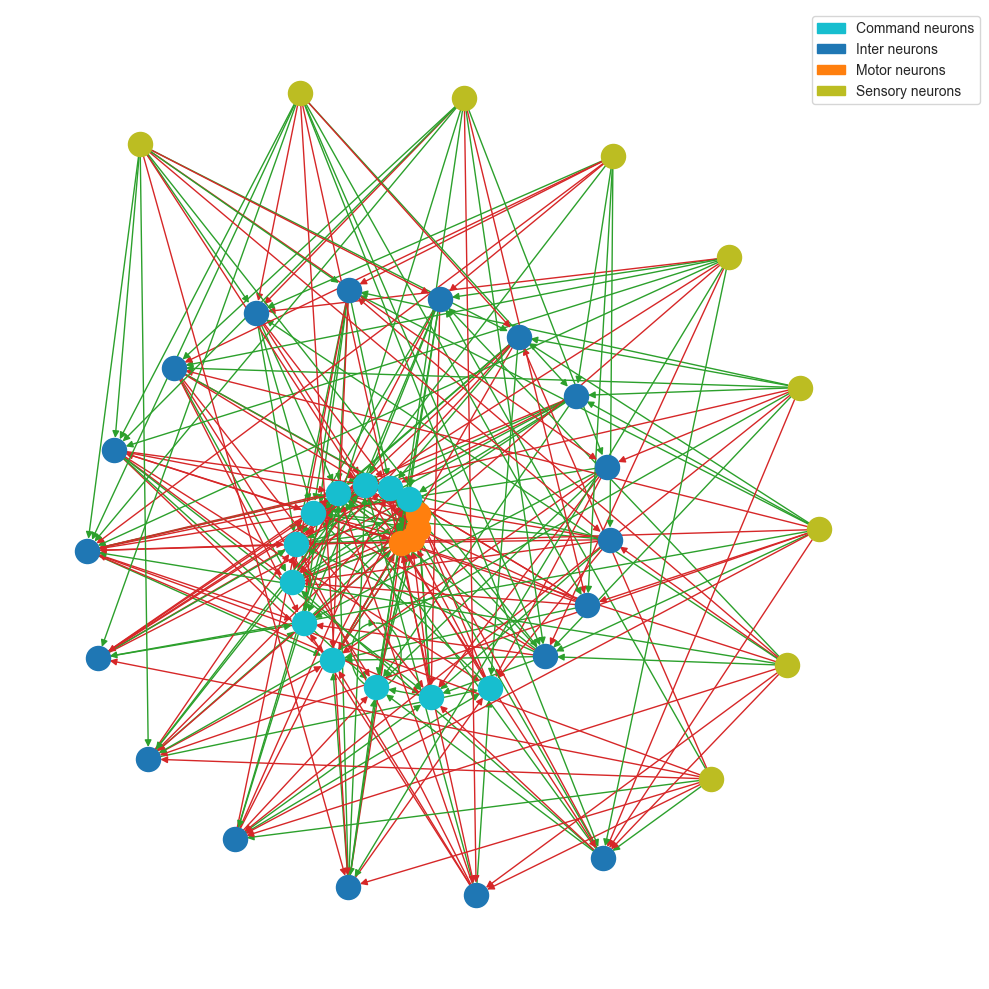

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
plt.figure(figsize=(10, 10))
legend_handles = wiring.draw_graph(layout='spiral',neuron_colors={"command": "tab:cyan"})
plt.legend(handles=legend_handles, loc="upper center", bbox_to_anchor=(1, 1))
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [14]:
output_dumy

tensor([-0.5915,  0.9482,  0.5166,  0.3260,  0.3203, -0.9064, -1.2952,  0.3894,  1.0232], device='cuda:0')

In [15]:
wiring.output_dim, wiring.synapse_count, wiring.units

(4, 100, 34)

In [66]:
output_dumy.shape, output_dumy.size(0)

(torch.Size([1, 9]), 1)

In [112]:
from ncps.torch import LTC
ltc_model = LTC(output_dumy.size(-1), wiring, batch_first=True).to(device)


In [69]:
ltc_model

LTC(
  (rnn_cell): LTCCell(
    (make_positive_fn): Softplus(beta=1.0, threshold=20.0)
    (_clip): ReLU()
  )
)

In [70]:
ltc_model.state_size, ltc_model.input_size

(28, 9)

In [127]:
next_state = None

In [128]:
print(f"wiring.input_dim: {wiring.input_dim}")
print(f"wiring.units: {wiring.units}")
print(f"flattened_output.shape: {output_dumy.shape}")

motor_output, next_state = ltc_model(output_dumy, next_state)

print(f"motor_output.shape: {motor_output.shape}")
print(f"next_state.shape: {next_state.shape}")

wiring.input_dim: 9
wiring.units: 34
flattened_output.shape: torch.Size([1, 9])
is_batched: False
motor_output.shape: torch.Size([1, 4])
next_state.shape: torch.Size([34])


In [129]:
print("Original ")
motor_output, next_state

Original 


(tensor([[-0.0033,  0.1610,  0.2250, -0.1141]], device='cuda:0', grad_fn=<SqueezeBackward1>),
 tensor([-0.0033,  0.1610,  0.2250, -0.1141, -0.1066,  0.0906, -0.1799, -0.4060,  0.2961,  0.4439,  0.0899, -0.0302, -0.3981,  0.3540,  0.0854, -0.1926,  0.5165, -0.5841,  0.0605,  0.2655,  0.3154,  0.0264, -0.3865, -0.4842,  0.7780,  0.0706,  0.3815, -0.2741,  0.1459, -0.4137, -0.0131,  0.3399, -0.4225, -0.3431],
        device='cuda:0', grad_fn=<SelectBackward0>))

In [125]:
next_state

tensor([-0.0033,  0.1610,  0.2250, -0.1141, -0.1066,  0.0906, -0.1799, -0.4060,  0.2961,  0.4439,  0.0899, -0.0302, -0.3981,  0.3540,  0.0854, -0.1926,  0.5165, -0.5841,  0.0605,  0.2655,  0.3154,  0.0264, -0.3865, -0.4842,  0.7780,  0.0706,  0.3815, -0.2741,  0.1459, -0.4137, -0.0131,  0.3399, -0.4225, -0.3431],
       device='cuda:0', grad_fn=<SelectBackward0>)

In [126]:
motor_output

tensor([[-0.0033,  0.1610,  0.2250, -0.1141]], device='cuda:0', grad_fn=<SqueezeBackward1>)

In [130]:
ltc_model.state_dict()

OrderedDict([('rnn_cell.gleak',
              tensor([0.9315, 0.6831, 0.7663, 0.5707, 0.8630, 0.7692, 0.4702, 0.3231, 0.8409, 0.3244, 0.7787, 0.8476, 0.1134, 0.0569, 0.5289, 0.9491, 0.4854, 0.6829, 0.0236, 0.8175, 0.7813, 0.4068, 0.6873, 0.0337, 0.1726, 0.1736, 0.1586, 0.6063, 0.1544, 0.1272, 0.3050, 0.1029, 0.2166, 0.0705], device='cuda:0')),
             ('rnn_cell.vleak',
              tensor([ 0.1498,  0.0602,  0.1073,  0.1202, -0.1012, -0.1123,  0.1922,  0.0896, -0.1819, -0.0992,  0.1926, -0.1753,  0.0978,  0.0952, -0.0338,  0.0713,  0.0078, -0.1255,  0.1632, -0.1376, -0.0857,  0.0516,  0.0767, -0.0143,  0.1956,  0.1437, -0.0960, -0.1365,  0.1201, -0.0741, -0.0213,  0.0551, -0.1812,  0.1262],
                     device='cuda:0')),
             ('rnn_cell.cm',
              tensor([0.5370, 0.4117, 0.4933, 0.5877, 0.5830, 0.4277, 0.4365, 0.5388, 0.4581, 0.4123, 0.5654, 0.5654, 0.4327, 0.4380, 0.4031, 0.5385, 0.4804, 0.4058, 0.5699, 0.5085, 0.4275, 0.5955, 0.4844, 0.4047, 0.4940, 0.

In [ ]:
torch.save({'state': ltc_model.state_dict(), 'wiring': ltc_model.wir, 'input_size':ltc_model.input_size, 'next_state': next_state},
           'ltccell_weights.pt')

In [ ]:
checkpoint = torch.load('ltccell_weights.pt')
wiring = checkpoint['wiring']
rnn_cell_state_dict = checkpoint['state']
next_state = checkpoint['next_state']
input_size = checkpoint['input_size']
input_size, checkpoint.keys()

(9, dict_keys(['state', 'wiring', 'input_size', 'next_state']))

In [ ]:
ltc_model = LTC(input_size, wiring, batch_first=True).to(device)
ltc_model.load_state_dict(rnn_cell_state_dict)
ltc_model.train

<bound method Module.train of LTC(
  (rnn_cell): LTCCell(
    (make_positive_fn): Softplus(beta=1.0, threshold=20.0)
    (_clip): ReLU()
  )
)>

In [208]:
next_state = None
motor_output, next_state = ltc_model(output_dumy)
motor_output

is_batched: False


tensor([[0.0966, 0.3531, 0.0666, 0.1182]], device='cuda:0', grad_fn=<SqueezeBackward1>)

In [192]:
print("Original ")
motor_output, next_state

Original 


(tensor([[0.0966, 0.3531, 0.0666, 0.1182]], device='cuda:0', grad_fn=<SqueezeBackward1>),
 tensor([ 0.0966,  0.3531,  0.0666,  0.1182,  0.0731,  0.1178,  0.3304,  0.1704,  0.2656,  0.1498, -0.1103,  0.2492,  0.0314, -0.1064,  0.1745, -0.0196,  0.2035,  0.6920, -0.1597,  0.4483, -0.1553,  0.0730, -0.1050,  0.3399, -0.2239,  0.2849, -0.1166,  0.1388,  0.4818, -0.1599,  0.3007, -0.0096,  0.1913,  0.2543],
        device='cuda:0', grad_fn=<SelectBackward0>))

In [117]:
def compare_state_dicts(state_dict1, state_dict2):
    for key in state_dict1:
        if not torch.equal(state_dict1[key], state_dict2[key]):
            return False
    return True

# Assuming you have saved and loaded the weights
is_same = compare_state_dicts(rnn_cell.state_dict(), new_rnn_cell.state_dict())

if is_same:
    print("Models have identical state dictionaries (weights and biases).")
else:
    print("Models have different state dictionaries.")

Models have identical state dictionaries (weights and biases).


In [ ]:
is_same = compare_state_dicts(rnn_cell.state_dict(), new_rnn_cell.state_dict())

if is_same:
    print("Models have identical state dictionaries (weights and biases).")
else:
    print("Models have different state dictionaries.")

In [ ]:
save_path = '/content/drive/MyDrive/ncp_model_save/rnn_cell.pt'

In [ ]:
torch.save(rnn_cell.state_dict(), save_path)

# **LTC modal**

In [ ]:
start = time.time()
inputs = processor(text=prompt, images=image, return_tensors="pt", padding=True).to(device, torch.float16)
end = time.time()
print(f"Time taken: {end - start} seconds")
for key in inputs.keys():
    print(f"{key}: {inputs[key].shape}")


Time taken: 0.04747629165649414 seconds
input_ids: torch.Size([1, 100])
attention_mask: torch.Size([1, 100])
pixel_values: torch.Size([1, 3, 768, 768])


In [ ]:
class NCPModel(nn.Module):
    def __init__(self, seed=22222, input_dim=519936, model_id = 'Florance2-base', rnn_name = "ltccell_weight.pt", device = "cpu"):
        super(NCPModel, self).__init__()
        self.device = device
        self.input_dim = input_dim
        self.input_ids = None
        self.attention_mask = None

        self.model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, torch_dtype='auto').to(self.device)
        for param in self.model.parameters():
          param.requires_grad = False
        self.wiring = wirings.NCP(
            inter_neurons=18,
            command_neurons=12,
            motor_neurons=4,
            sensory_fanout=6,
            inter_fanout=4,
            recurrent_command_synapses=4,
            motor_fanin=6,
            seed=seed,
        )

        model_path = f"{model_id}/{rnn_name}"
        if os.path.isfile(model_path):
          checkpoint = torch.load(f"{model_path}", weights_only=True)
          self.input_dim = checkpoint['input_dim']

        self.wiring.set_input_dim(self.input_dim)
        self.wiring.build(self.input_dim)
        self.rnn_cell = ncps.torch.LTCCell(wiring=self.wiring).to(self.device)

        if os.path.isfile(model_path):
          print(f"Loading model from: {model_path}")
          self.rnn_cell.load_state_dict(checkpoint['state'])
          self.current_state = checkpoint['next_state']
        else:
          self.current_state =  torch.zeros(1, self.rnn_cell.state_size).to(self.device)
          print(f"RNN file not found. Initializing New")


    def forward(self, pixel_values, input_ids= None, attention_mask = None):
        if input_ids is not None and attention_mask is not None:
            self.input_ids = input_ids
            self.attention_mask = attention_mask
        elif self.input_ids is None and self.attention_mask is None:
            raise ValueError("Both input_ids and attention_mask cannot be None. Atleast provide Once")

        start = time.time()
        with torch.no_grad():
          encoded_output = self.model(input_ids = self.input_ids, pixel_values = pixel_values, attention_mask = self.attention_mask)
        end = time.time()
        print(f"Time taken for image encoding : {end - start} seconds")

        start = time.time()
        last_hidden_state = encoded_output["last_hidden_state"]
        flattened_output = last_hidden_state.view(last_hidden_state.shape[0], -1)
        motor_output, next_state = self.rnn_cell(flattened_output, self.current_state)

        self.current_state = next_state
        end = time.time()
        print(f"Time taken for Liquid network: {end - start} seconds")

        return {"motor_output" : motor_output, "next_state" : next_state, "encoded_output" : encoded_output}

    def text_length_change(self, input_ids, attention_mask, pixel_values):

        """
        Default = 100 words
        Use this function if you change the length of text string or pixal_values. Increase or decrease.
        Process the new string and Image size and pass its input_ids, attention_mask, pixel_values.

        Note that changing length will result in initializing new model so remember to save its weights (State).
        """

        encoded_output = self.model(input_ids = input_ids, pixel_values = pixel_values, attention_mask = attention_mask)
        last_hidden_state = encoded_output["last_hidden_state"]
        flattened_output = torch.flatten(last_hidden_state)
        self.input_dim = flattened_output.size(0)

        self.wiring.set_input_dim(self.input_dim)
        self.wiring.build(self.input_dim)
        self.rnn_cell = ncps.torch.LTCCell(wiring=self.wiring).to(self.device)

    def new_sequence(self, current_state=None):

        """ Initialize the memory state with zeros in case of New Sequence
        Also initialize memory state from given current state which will be used as new state for next iteration
        """

        if current_state is None:
          self.current_state = torch.zeros(1, self.rnn_cell.state_size).to(self.device)
        else:
          self.current_state = current_state

    def save_model(self, path):
        """
        Saves the model state dictionary and other relevant information to a checkpoint file.
        """
        torch.save({'state': self.rnn_cell.state_dict(), 'next_state': self.current_state, 'input_dim': self.input_dim}, f"{path}")
        print(f"Model saved at {path}")

    def load_model(self, path):
        checkpoint = torch.load(f"{path}")
        self.input_dim = checkpoint['input_dim']

        """ initialize the Skeleton for rnn cell"""
        self.wiring.set_input_dim(self.input_dim)
        self.wiring.build(self.input_dim)
        self.rnn_cell = ncps.torch.LTCCell(wiring=self.wiring).to(self.device)

        """ Loading weights (State) into rnn_cell"""
        self.rnn_cell.load_state_dict(checkpoint['state'])
        self.current_state = checkpoint['next_state']
        print(f"Model loaded from {path}")


In [ ]:
ltc_modal = NCPModel(model_id = model_id, device = device).to(device)

Some weights of the model checkpoint at /content/Florance2-change were not used when initializing Florence2ForConditionalGeneration: ['language_model.final_logits_bias', 'language_model.lm_head.weight', 'language_model.model.decoder.embed_positions.weight', 'language_model.model.decoder.embed_tokens.weight', 'language_model.model.decoder.layernorm_embedding.bias', 'language_model.model.decoder.layernorm_embedding.weight', 'language_model.model.decoder.layers.0.encoder_attn.k_proj.bias', 'language_model.model.decoder.layers.0.encoder_attn.k_proj.weight', 'language_model.model.decoder.layers.0.encoder_attn.out_proj.bias', 'language_model.model.decoder.layers.0.encoder_attn.out_proj.weight', 'language_model.model.decoder.layers.0.encoder_attn.q_proj.bias', 'language_model.model.decoder.layers.0.encoder_attn.q_proj.weight', 'language_model.model.decoder.layers.0.encoder_attn.v_proj.bias', 'language_model.model.decoder.layers.0.encoder_attn.v_proj.weight', 'language_model.model.decoder.laye

Loading model from: /content/Florance2-change/ltccell_weight.pt


In [164]:
with torch.no_grad():
  liquid_output = ltc_modal(input_ids=inputs["input_ids"],
          pixel_values=inputs["pixel_values"],
          attention_mask=inputs["attention_mask"]
          )


Forward Started
Time taken for image encoding : 0.0989992618560791 seconds
Time taken for Liquid network: 0.0020716190338134766 seconds


In [165]:
liquid_output['next_state'].shape

torch.Size([1, 34])

In [166]:
output = liquid_output
output.keys()

dict_keys(['motor_output', 'next_state', 'encoded_output'])

In [167]:
# Save everything
ltc_modal.save_model(f"{model_id}/ltccell_weight.pt")

Model saved at /content/Florance2-change/ltccell_weight.pt


In [169]:
ltc_modal.load_model(f"{model_id}/ltccell_weight.pt", weights_only=True)

<ipython-input-162-35cae6bbc332>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f"{path}")


Model loaded from /content/Florance2-change/ltccell_weight.pt


In [168]:
def compare_models(model1, model2):
    """Compares two PyTorch models by comparing their state dictionaries.

    Args:
        model1: The first model.
        model2: The second model.

    Returns:
        True if the models' state dictionaries are identical, False otherwise.
        Prints detailed information about any differences.
    """

    if model1 is None or model2 is None:
        print("One or both models are None. Cannot compare.")
        return False

    state_dict1 = model1.state_dict()
    state_dict2 = model2.state_dict()

    if len(state_dict1) != len(state_dict2):
        print("Models have different numbers of parameters.")
        return False

    for (key1, param1), (key2, param2) in zip(state_dict1.items(), state_dict2.items()):
        if key1 != key2:
            print(f"Key mismatch: {key1} vs. {key2}")
            return False
        if not torch.equal(param1, param2):
            print(f"Parameter mismatch for key: {key1}")
            # Optionally print more details about the mismatch:
            # print(f"Param 1: {param1}")
            # print(f"Param 2: {param2}")
            # print(f"Difference: {torch.abs(param1 - param2).sum()}") #Sum of absolute differences
            return False

    print("Models are identical.")
    return True


In [ ]:
del ltc_modal
torch.cuda.empty_cache()

In [ ]:
checkpoint_dir = "checkpoint"
checkpoint_path = os.path.join(checkpoint_dir, "checkpoint.pth")

# Make sure the checkpoint directory exists
os.makedirs(checkpoint_dir, exist_ok=True)

In [ ]:
def save_checkpoint(model, optimizer, epoch, batch_idx, loss):
    checkpoint = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'epoch': epoch,
        'batch_idx': batch_idx,
        'loss': loss
    }
    torch.save(checkpoint, checkpoint_path)
    print(f"Checkpoint saved at epoch {epoch}, batch {batch_idx}")

In [ ]:
def load_checkpoint(model, optimizer):
    if os.path.exists(checkpoint_path):
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_epoch = checkpoint['epoch']
        start_batch = checkpoint['batch_idx']
        loss = checkpoint['loss']
        print(f"Loaded checkpoint from epoch {start_epoch}, batch {start_batch}, loss: {loss}")
        return start_epoch, start_batch
    else:
        return 0, 0

In [ ]:
# Load data and create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# Create the model and optimizer
model = NCPModel(rnn_sizes=[128])  # Example RNN size
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Load the latest checkpoint if available
start_epoch, start_batch = load_checkpoint(model, optimizer)

# Training loop with checkpointing
for epoch in range(start_epoch, num_epochs):
    for batch_idx, (input_ids, attention_mask, labels) in enumerate(train_loader):

        # Skip batches if resuming from a checkpoint
        if epoch == start_epoch and batch_idx < start_batch:
            continue

        # Pass input data to the model
        motor_output, _ = model(input_ids, attention_mask)

        # Calculate loss
        loss = loss_fn(motor_output, labels)

        # Backpropagate and update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print training progress (optional)
        if batch_idx % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}")

        # Save checkpoints every 500 batches
        if batch_idx % 500 == 0:
            save_checkpoint(model, optimizer, epoch, batch_idx, loss.item())

    # Save a checkpoint at the end of each epoch
    save_checkpoint(model, optimizer, epoch, batch_idx, loss.item())

# Save the final model
torch.save(model.state_dict(), "trained_model.pth")

In [ ]:
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)


# Hyperparameters
batch_size = 32
num_epochs = 10
learning_rate = 0.001
loss_fn = nn.MSELoss()  # Or other suitable loss function

# Load data and create data loaders
train_dataset = DroneDataset(train_data, train_labels)
val_dataset = DroneDataset(val_data, val_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)


# Create the model and optimizer
model = NCPModel(rnn_sizes=[128])  # Example RNN size
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for batch_idx, (input_ids, attention_mask, labels) in enumerate(train_loader):

        # Pass input data to the model
        motor_output, _ = model(input_ids, attention_mask)
        # Calculate loss
        loss = loss_fn(motor_output, labels)
        # Backpropagate and update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Print training progress (optional)
        if batch_idx % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}")
# Save the final model
torch.save(model.state_dict(), "trained_model.pth")

# Save the final hidden state
torch.save(model.hidden_state, "ncp_hidden_state.pt")

In [ ]:
data_sequence_1 = torch.randn(10, 5)  # 10 samples with 5 features each
labels_sequence_1 = torch.tensor([1] * 10)  # All samples have the label 1

data_sequence_2 = torch.randn(5, 5)  # 5 samples with 5 features each
labels_sequence_2 = torch.tensor([2] * 5)  # All samples have the label 2

data_sequence_3 = torch.randn(8, 5)  # 8 samples with 5 features each
labels_sequence_3 = torch.tensor([3] * 8)  # All samples have the label 3

# Concatenate the data and labels
all_data = torch.cat([data_sequence_1, data_sequence_2, data_sequence_3], dim=0)
all_labels = torch.cat([labels_sequence_1, labels_sequence_2, labels_sequence_3], dim=0)

# Define a Dataset class
class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Create dataset and dataloader
dataset = MyDataset(all_data, all_labels)
dataloader = DataLoader(dataset, batch_size=4, shuffle=False)

# Initialize previous label to track changes
previous_label = None

# Training loop
for batch_idx, (data, labels) in enumerate(dataloader):
    # Check for new sequence start (for example, based on folder logic)
    # This is a dummy condition to illustrate. Replace with actual logic.
    new_sequence = (batch_idx == 0 or labels[0] != previous_label)  # Example check

    # If it's a new sequence, reset the hidden state (if you have one)
    if new_sequence:
        print(f"New sequence detected at batch {batch_idx}. Resetting hidden state.")

    # Check for label changes
    current_label = labels[0].item()  # Get the first label in the batch

    if previous_label is not None and current_label != previous_label:
        print(f"Label changed at batch {batch_idx}. Previous label: {previous_label}, New label: {current_label}")

    # Update the previous label
    previous_label = current_label

    # Training logic (dummy)
    print(f"Processing batch {batch_idx}, Current label: {current_label}")
    print(f"Data: {data}")
    print(f"Labels: {labels}")

New sequence detected at batch 0. Resetting hidden state.
Processing batch 0, Current label: 1
Data: tensor([[ 0.0752, -0.5114,  1.0119,  0.3429, -1.2358],
        [ 1.3411,  1.5120, -0.3691,  0.2243, -0.7413],
        [ 0.3553,  0.3945, -1.0841, -0.1627,  0.7226],
        [ 0.2324, -0.4964,  1.5242, -0.3093, -0.5904]])
Labels: tensor([1, 1, 1, 1])
Processing batch 1, Current label: 1
Data: tensor([[-0.7104, -0.8308, -0.1727, -0.9666,  2.1928],
        [ 0.9706,  0.5765, -0.4784, -1.7803,  1.4432],
        [-1.0383, -1.5910,  0.1290, -1.7493,  0.6253],
        [ 0.6061, -0.0163, -1.7208,  1.9895, -0.3803]])
Labels: tensor([1, 1, 1, 1])
Processing batch 2, Current label: 1
Data: tensor([[-1.6816,  0.3082,  1.3665,  0.0833,  0.0605],
        [ 0.4752,  1.3102,  0.8281, -0.1959,  0.1478],
        [ 0.6352, -0.6566, -0.3110, -0.7407, -0.3510],
        [ 0.1961,  0.8392, -0.7479, -0.7521,  0.8620]])
Labels: tensor([1, 1, 2, 2])
New sequence detected at batch 3. Resetting hidden state.
Label

# **Combo with Yolov11 modal**

## **Bert output**

In [ ]:
from transformers import BertModel, BertTokenizer
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

local_model_path = "E:/ml/bert-base-uncased"  # Replace with your actual path

try:
    bert_model = BertModel.from_pretrained(local_model_path).to(device)
    tokenizer = BertTokenizer.from_pretrained(local_model_path)
    print("BERT model and tokenizer loaded successfully from local directory!")
except Exception as e:
    print(f"Error loading BERT model: {e}")

BERT model and tokenizer loaded successfully from local directory!


In [10]:
text = "Fly me to the building"

In [14]:
inputs = tokenizer(text, return_tensors="pt", padding="max_length", truncation=True, max_length=100).to(device)
inputs['input_ids'].shape

torch.Size([1, 100])

In [12]:
with torch.no_grad():
    bert_output = bert_model(**inputs).last_hidden_state.mean(dim=1)
print(bert_output.shape)

torch.Size([1, 768])


## **Yolo**

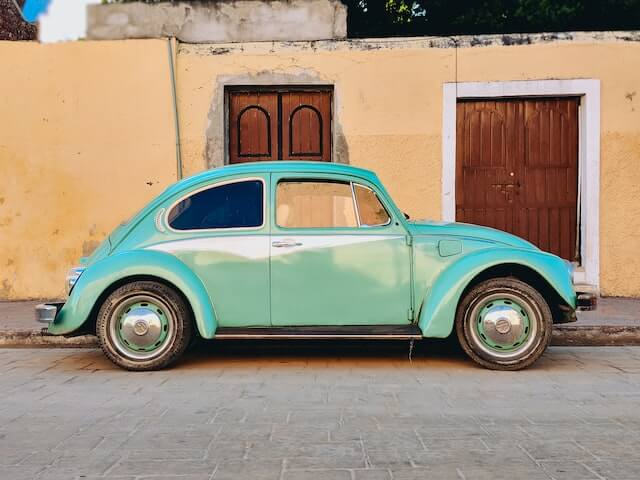

In [5]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
image.size

(640, 480)

In [6]:
model = Drone("yolo11s-seg.pt")

Drone init called


In [ ]:
embedding = model.predict(image)

In [22]:
len(embedding[0])

1

In [ ]:
print(model.model.model)

In [ ]:
print(model.model.model[16])

In [ ]:
model.eval

In [ ]:
first_run = True

features = []
def hook_function(module, input, output):
    global first_run
    if first_run == True:
        first_run = False
    else:
      features.append(output)

hook_handle = model.model.model[16].register_forward_hook(hook_function)

In [ ]:
hook_handle.remove()


In [29]:
len(features)

2

In [ ]:
del model

In [ ]:
with torch.no_grad():
    output = model(image)

In [24]:
print(128*60*80)

614400


In [5]:
class SpatialAwareMLP(nn.Module):
    def __init__(self, input_dim=None, reduced_dim=None, spatial_height=None, spatial_width=None, model_path=None):
        """
        Initialize SpatialAwareMLP model
        
        Args:
            input_dim: Input dimension size (required if model_path is None)
            reduced_dim: Reduced output dimension size (required if model_path is None)
            spatial_height: Original spatial height (required if model_path is None)
            spatial_width: Original spatial width (required if model_path is None)
            model_path: Path to load a saved model (if provided, other params are optional)
        """
        super().__init__()
        
        # Check if loading from a path
        if model_path is not None:
            self._load_from_path(model_path)
        else:
            # Validate required parameters for creating a new model
            if None in (input_dim, reduced_dim, spatial_height, spatial_width):
                raise ValueError("When model_path is not provided, all of input_dim, reduced_dim, spatial_height, and spatial_width must be specified")
            
            # Create a new model
            self._create_new_model(input_dim, reduced_dim, spatial_height, spatial_width)

    def forward(self, x):
        """
        Forward pass through the model
        
        Args:
            x: Input tensor with shape [batch_size, channels, height, width]
        """
        # Reshape spatial dimensions to feature dimension
        batch_size, channels, height, width = x.shape
        x_flattened = x.reshape(batch_size, channels, -1).permute(0, 2, 1)  # [batch, h*w, channels]
        x_flattened = x_flattened.reshape(-1, channels)  # [batch*h*w, channels]
        
        # Pass through MLP
        reduced_features = self.spatial_mlp(x_flattened)  # [batch*h*w, reduced_dim]
        
        # Reshape back to spatial dimensions
        reduced_features = reduced_features.reshape(batch_size, self.spatial_height * self.spatial_width, -1)
        reduced_features = reduced_features.permute(0, 2, 1).reshape(batch_size, self.reduced_dim, height, width)
        # Apply spatial encoding
        enhanced_features = reduced_features + self.spatial_encoding
        
        return enhanced_features
    
    def _create_new_model(self, input_dim, reduced_dim, spatial_height, spatial_width):
        """Initialize a new model with given parameters"""
        self.input_dim = input_dim
        self.reduced_dim = reduced_dim
        self.spatial_height = spatial_height
        self.spatial_width = spatial_width
        
        self.spatial_mlp = nn.Sequential(
            nn.Linear(input_dim, input_dim // 2),
            nn.BatchNorm1d(input_dim // 2),
            nn.ReLU(),
            
            nn.Linear(input_dim // 2, reduced_dim),
            nn.BatchNorm1d(reduced_dim),
            nn.ReLU()
        )
        
        self.spatial_encoding = nn.Parameter(
            torch.randn(1, reduced_dim, spatial_height, spatial_width)
        )
    
    def _load_from_path(self, model_path):
        """Load model from a saved checkpoint"""
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        # Load checkpoint
        checkpoint = torch.load(model_path, map_location=device)
        
        # Extract model configuration
        config = checkpoint['model_config']
        self.input_dim = config['input_dim']
        self.reduced_dim = config['reduced_dim']
        self.spatial_height = config['spatial_height']
        self.spatial_width = config['spatial_width']
        
        # Create model architecture first
        self._create_new_model(
            self.input_dim,
            self.reduced_dim,
            self.spatial_height, 
            self.spatial_width
        )
    
        # Then load state dict
        self.load_state_dict(checkpoint['model_state_dict'])
        
        # Store training info if available
        self.last_epoch = checkpoint.get('epoch', None)
        self.last_loss = checkpoint.get('loss', None)
        
        print(f"Model loaded from {model_path}")
    
    def save(self, filepath, optimizer=None, epoch=None, loss=None):
        """
        Save the model to disk
        
        Args:
            filepath: Path where to save the model
            optimizer: Optional optimizer to save its state
            epoch: Optional current epoch number
            loss: Optional current loss value
        """
        # Create directory if it doesn't exist
        os.makedirs(os.path.dirname(filepath), exist_ok=True)
        
        # Prepare state dictionary
        checkpoint = {
            'model_state_dict': self.state_dict(),
            'model_config': {
                'input_dim': self.input_dim,
                'reduced_dim': self.reduced_dim,
                'spatial_height': self.spatial_height,
                'spatial_width': self.spatial_width
            }
        }
        
        # Add optimizer and training info if provided
        if optimizer is not None:
            checkpoint['optimizer_state_dict'] = optimizer.state_dict()
        if epoch is not None:
            checkpoint['epoch'] = epoch
        if loss is not None:
            checkpoint['loss'] = loss
        
        # Save the checkpoint
        torch.save(checkpoint, filepath)
        print(f"Model saved to {filepath}")


In [11]:
spatial_mlp = SpatialAwareMLP(
            input_dim=128,       # Input channels from YOLO
            reduced_dim=16,      # Reduced dimension (you can adjust this)
            spatial_height=80,   # Feature map height 
            spatial_width=80     # Feature map width
        ).to(device)

#spatial_mlp.save("./checkpoint_epoch_spatem_model.pth")

In [12]:
# Create dummy input with shape [batch_size, channels, height, width]
batch_size = 2
input_channels = 128  # Must match input_dim
height = 80  # Must match spatial_height
width = 80   # Must match spatial_width

dummy_input = torch.randn(batch_size, input_channels, height, width).to(device)

# Forward pass
output = spatial_mlp(dummy_input)

# Check output shape
print(f"Input shape: {dummy_input.shape}")
print(f"Output shape: {output.shape}")

# Flatten the output to see its shape
flattened_output = output.reshape(batch_size, -1)
print(f"Flattened output shape: {flattened_output.shape}")

Input shape: torch.Size([2, 128, 80, 80])
Output shape: torch.Size([2, 16, 80, 80])
Flattened output shape: torch.Size([2, 102400])


In [ ]:
class DroneControlSystem1(nn.Module):
    def __init__(self, base_model = "yolo11s-seg.pt", yolo_layer = 16, bert_model_name='bert-base-uncased', text = None, seed = 22222, device = 'cpu'):
        super(DroneControlSystem1, self).__init__()
        self.device = device

        self.input_dim, self.spatial_height ,self.spatial_width = 128, 80, 80  #YOlo output from hook
        self.reduced_dim = 32

        self.yolo_output = self.input_dim * self.spatial_height * self.spatial_width
        
        #self.spatial_mlp = SpatialAwareMLP(
        #    input_dim=self.input_dim,       # Input channels from YOLO
        #    reduced_dim=self.reduced_dim,      # Reduced dimension (you can adjust this)
        #    spatial_height=self.spatial_height,   # Feature map height 
        #    spatial_width=self.spatial_width     # Feature map width
        #).to(device)


        self.bert_model = BertModel.from_pretrained(bert_model_name).to(self.device)  # BERT model
        self.tokenizer = BertTokenizer.from_pretrained(bert_model_name)

        self.yolo = Drone(base_model)
        for param in self.yolo.parameters():
            param.requires_grad = True  # yolo trainable

        for param in self.bert_model.parameters():
            param.requires_grad = False  # Freeze BERT

        # Text encoding using BERT (done without updating BERT)
        if not text:
            text = "Fly Towards the Red Chair"
        inputs = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(self.device)
        with torch.no_grad():
            self.bert_output = self.bert_model(**inputs).last_hidden_state.mean(dim=1)

        self.modified_output_from_hook = None

        self.wiring = wirings.NCP(
            inter_neurons=18,
            command_neurons=12,
            motor_neurons=4,
            sensory_fanout=6,
            inter_fanout=4,
            recurrent_command_synapses=4,
            motor_fanin=6,
            seed=seed,
        )

        self.c3k2_module = self.yolo.model.model[yolo_layer]
        self.hook_handle = self.c3k2_module.register_forward_hook(self.hook_function)

        bert_size = 768
        self.input_size =  self.yolo_output + bert_size

        self.wiring.set_input_dim(self.input_size)
        self.wiring.build(self.input_size)

        self.rnn_cell = LTC(self.input_size, self.wiring, batch_first=True).to(device)

        self.current_state = None

    def forward(self, image, text=None, new_sequence=False):
        if new_sequence:
            self.current_state = None

        # Perform forward pass with no gradient computation for YOLO and BERT
        with torch.no_grad():
            start = time.time()
            yolo_output = self.yolo(image)  # YOLO forward pass
            end = time.time()
            print(f"Time taken for image encoding : {end - start} seconds")

        if text is not None:
            start = time.time()
            inputs = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(self.device)
            with torch.no_grad():
                self.bert_output = self.bert_model(**inputs).last_hidden_state.mean(dim=1)  # BERT output
            end = time.time()
            print(f"Time taken for text encoding : {end - start} seconds")

        start_mlp = time.time()
        flattened_output = self.modified_output_from_hook.view(self.modified_output_from_hook.shape[0], -1).clone()
        bert_output_expanded = self.bert_output.expand(flattened_output.shape[0], -1)
        combined_output = torch.cat((flattened_output, bert_output_expanded), dim=1)
        #yolo_layer = self.modified_output_from_hook.clone()
        #processed_features = self.spatial_mlp(yolo_layer)
        #flattened_features = processed_features.contiguous().view(processed_features.shape[0], -1)
        #bert_output_expanded = self.bert_output.expand(flattened_features.shape[0], -1)
        #combined_output = torch.cat((flattened_features, bert_output_expanded), dim=1)
        end_mlp = time.time()
        print(f"Time taken for SpatialAwareMLP: {end_mlp - start_mlp} seconds")
        self.current_state = self.current_state  #.clone()
        motor_output, self.current_state = self.rnn_cell(combined_output, self.current_state)
        end = time.time()
        #gc.collect()
        #torch.cuda.empty_cache()

        print(f"Time taken for Liquid network: {end - start} seconds")
        return {"motor_output": motor_output, "next_state": self.current_state, "visual_embed": self.modified_output_from_hook}

    # Hook function to capture the output of C3k2 Mid
    def hook_function(self, module, input, output):
        #print(f"C3k2 for layer {self.yolo_layer} output shape: {output.shape}")
        self.modified_output_from_hook = output  # Store the output from the hook
        return output

    # Mind do not use this function NEVER in good sense
    def remove_hook(self):
        self.hook_handle.remove()

yolo_model_lnn = DroneControlSystem1(device = device)

In [75]:
torch.save({
        'model_state': yolo_model_lnn.rnn_cell.state_dict(),
    }, f"checkpoint_epoch_rnn_32.pt")

In [ ]:
outputyolo = yolo_model_lnn(image, text)

In [ ]:
outputyolo

VIdeo Mask Processor

In [5]:
import cv2
def draw_bboxes(image, bboxes, font_size=20, draw_center=True):
    """
    Draw bounding boxes on an image (accepts image path, PIL Image, 
    torch.Tensor, or NumPy array).

    Args:
        image: Path to image, PIL Image, torch.Tensor (C, H, W) or (1, C, H, W), 
               or NumPy array (H, W, C) or (H,W).
        bboxes: List of bounding boxes [(x_min, y_min, x_max, y_max, conf, class_id)].
        font_size: Size of the text font.

    Returns:
        PIL Image with drawn bounding boxes.
    """

    if isinstance(image, str):  # If it's a path
        pil_image = Image.open(image).convert("RGB")  # Open and convert to RGB
        print(pil_image.size)

    elif isinstance(image, torch.Tensor):
        # Convert torch.Tensor to PIL Image
        if image.ndim == 4:  # If it has a batch dimension (1, C, H, W)
            image = image.squeeze(0)  # Remove the batch dimension

        if image.is_cuda:
            image = image.cpu()

        image = image.permute(1, 2, 0)  # Change to HWC

        if image.dtype == torch.float:
            image_numpy = image.numpy()
        elif image.dtype == torch.uint8:
            image_numpy = image.numpy() / 255.0
        else:
            raise TypeError("Tensor dtype should be either torch.float or torch.uint8")

        pil_image = Image.fromarray((image_numpy * 255).astype(np.uint8))  # Scale to 0-255 and convert to uint8
        print(pil_image.size)

    elif isinstance(image, np.ndarray):
        if image.ndim == 2:  # Grayscale image (H, W)
            pil_image = Image.fromarray(image)
            print(pil_image.size)
        elif image.ndim == 3:  # Color image (H, W, C)
            pil_image = Image.fromarray(image)
            print(pil_image.size)
        else:
            raise ValueError("Numpy array should have 2 or 3 dimensions")
    elif isinstance(image, Image.Image):  # Check if it's already a PIL Image
        pil_image = image
        print(pil_image.size)
    else:
        raise TypeError("Unsupported image type. Must be path, PIL Image, torch.Tensor, or NumPy array.")


    draw = ImageDraw.Draw(pil_image)

    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except IOError:
        font = ImageFont.load_default()

    if isinstance(bboxes, torch.Tensor):
        if bboxes.ndim == 1:  # If it's a single bounding box, wrap it in a list
            bboxes = [bboxes.tolist()]
        else:
            bboxes = bboxes.tolist()

        
    for idx, bbox in enumerate(bboxes):
        x_min, y_min, x_max, y_max, conf, class_id = map(int, bbox[:6])

        # Draw the rectangle
        draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)

        # Format text
        text = f'Class {class_id}: {idx}'
        text_position = (x_min, max(0, y_min - font_size - 5))

        text_size = draw.textbbox(text_position, text, font=font)  # Get text size
        draw.rectangle(text_size, fill="black")  # Background rectangle

        for offset in [-1, 0, 1]:
            draw.text((text_position[0] + offset, text_position[1]), text, font=font, fill="white")
            draw.text((text_position[0], text_position[1] + offset), text, font=font, fill="white")

        #if draw_center:
        #    center_x = (x_min + x_max) // 2
        #    center_y = (y_min + y_max) // 2
        #    draw.ellipse((center_x - 3, center_y - 3, center_x + 3, center_y + 3), fill="blue")


    return pil_image



In [6]:
class TextProcessor(nn.Module):
    def __init__(self, bert_model_name=r'D:/ml/bert-base-uncased', device = 'cpu'):
        super(TextProcessor, self).__init__()
        self.device = device

        self.bert_model = BertModel.from_pretrained(bert_model_name).to(self.device)  # BERT model
        self.tokenizer = BertTokenizer.from_pretrained(bert_model_name)

        for param in self.bert_model.parameters():
            param.requires_grad = False  # Freeze BERT
                
    def forward(self, text):
        start = time.time()
        inputs = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(self.device)
        with torch.no_grad():
            self.bert_output = self.bert_model(**inputs).last_hidden_state.mean(dim=1)  # BERT output
        end = time.time()
        print(f"Time taken for text encoding : {end - start} seconds")

        return self.bert_output

In [7]:
bert_model = TextProcessor(device = device)
text = "Fly me to the moon"
bert_output = bert_model(text)
print(bert_output.shape)

Time taken for text encoding : 0.1392078399658203 seconds
torch.Size([1, 768])


In [8]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from filterpy.kalman import KalmanFilter
import torchvision.ops as ops
import numpy as np
    
class KalmanBoxTracker:
    def __init__(self, bbox):
        self.kf = KalmanFilter(dim_x=8, dim_z=4)
        self.kf.F = np.array([[1, 0, 0, 0, 1, 0, 0, 0],
                              [0, 1, 0, 0, 0, 1, 0, 0],
                              [0, 0, 1, 0, 0, 0, 1, 0],
                              [0, 0, 0, 1, 0, 0, 0, 1],
                              [0, 0, 0, 0, 1, 0, 0, 0],
                              [0, 0, 0, 0, 0, 1, 0, 0],
                              [0, 0, 0, 0, 0, 0, 1, 0],
                              [0, 0, 0, 0, 0, 0, 0, 1]])
        
        self.kf.H = np.eye(4, 8)
        self.kf.R *= 10
        self.kf.P *= 100
        self.kf.Q *= 0.01
        self.kf.x[:4] = np.array(bbox).reshape(4, 1)
        self.age = 0
        self.last_update = 0
    
    def predict(self):
        self.kf.predict()
        self.age += 1
        return self.kf.x[:4].flatten()

    def update(self, bbox):
        self.kf.update(np.array(bbox).reshape(4, 1))
        self.last_update = self.age

class VideoMaskProcessor(nn.Module):
    def __init__(self, in_channels, reference_mask=None, reference_bboxes=None, 
                 bert_embedding=None, target_size=(16, 16), device="cpu"):
        super().__init__()
        self.device = device
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, stride=1, padding=1),  # Reduce channels
            nn.ReLU(),
            nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),  # Reduce further
            nn.ReLU(),
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),  # Final reduction
            nn.ReLU()).to(device)
        
        self.dense_layers = nn.Sequential(
            nn.Linear(16 * 16 * 16, 768),  # Directly project to embedding size
            nn.ReLU(),
            nn.Linear(768, 512)).to(device) # Final 512-dim embedding

        self.bert_mlp = nn.Sequential(
            nn.Linear(768, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 768),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(768, 512)
        ).to(device)

        self.adaptive_pool = nn.AdaptiveAvgPool2d(target_size).to(device)

        self.bert_embedding = bert_embedding  #During Inferance It should be different and bert projection will be stored after passingthorugh sequantial layer and used over and over
        if self.bert_embedding is not None:
            self.bert_embedding = torch.tensor(bert_embedding, device=device).float()
            self.bert_proj = self.bert_mlp(bert_embedding)
        else:
            self.bert_proj = None
        
        self.reference_mask = reference_mask
        self.reference_memory = []
        self.max_memory_size = 10  
        self.reference_memory_original = [] #for training 

        self.recent_features = [] 
        self.recent_features_original = [] #for training
        self.recent_features_size = 5      #While in Training this should match the batch size so that all memory is new before back propagation

        self.target_size = target_size
        self.tracker = None
        self.is_occluded = False
        self.occlusion_counter = 0
        self.current_radius = 0.5
        self.radius_step = 0.5
        self.reference_bboxes = reference_bboxes
        
        self.occlusion_threshold = 0.05  
        self.occlusion_frames = 5  
        self.base_reid_threshold = 0.90  
        self.max_reid_threshold = 0.98  
        self.max_memory_similarity_threshold = 0.80  
        self.min_memory_similarity_threshold = 0.60
        
        self.detection_history = []  
        
        self.in_detection_phase = False
        self.detection_phase_counter = 0
        self.detection_phase_required_frames = 10
        self.memory_update_frozen = False
        self.last_detected_feature = None
        self.candidate_detection_scores = []
        
        self.permanent_memory = [] 
        self.next_permanent_index = 0
        self.permanent_memory_threshold = 0.85
        self.use_temporary_in_occlusion = True

        self.triplet_margin = 0.2  # Add margin parameter for triplet loss
        self.triplet_loss = nn.TripletMarginLoss(margin=self.triplet_margin) # Initialize triplet_loss function <---- ADDED THIS LINE
        self.bert_proj = None  # Will be set through forward passes

    def forward_bert_embedding(self, bert_embedding):
        self.bert_embedding = bert_embedding.clone().detach().to(self.device).float()
        self.bert_proj = self.bert_mlp(self.bert_embedding)
        return self.bert_proj
    
    def remove_bert_embedding(self):
        self.bert_embedding = None
        self.bert_proj = None
    
    def add_reference_to_permanent(self, feature):
        """Modified to preserve gradients during training"""
        if feature.dim() == 1:
            # Already processed (512-dim), add as is
            processed = feature.clone()
        elif feature.dim() == 2:
            # Processed feature with batch dim, remove batch
            processed = feature.squeeze(0).clone()
        else:
            # Raw feature (3D/4D), process through reduction
            if feature.dim() == 3:
                feature = feature.unsqueeze(0)  # Add batch dim
            if self.training:
                processed = self.reduce_channels(feature).squeeze(0)
            else:
                with torch.no_grad():
                    processed = self.reduce_channels(feature).squeeze(0)

        
        new_entry = {'feature': processed.clone(), 'index': self.next_permanent_index}
        self.permanent_memory.append(new_entry)
        self.next_permanent_index += 1
        return new_entry['index']
    
    def remove_from_permanent_by_index(self, index):
        self.permanent_memory = [entry for entry in self.permanent_memory if entry['index'] != index]

    def get_permanent_memory_info(self):
        return [{'index': entry['index']} for entry in self.permanent_memory]
    
    def reduce_channels(self, x):
        N, C, H, W = x.shape
        x = self.conv_layers(x)  # Apply convolutional layers
        x = x.view(N, -1)  # Flatten for MLP
        x = self.dense_layers(x)  # Pass through dense layers
        return x
    
    def start_training(self):
        self.training = True

    def stop_training(self):
        self.training = False

    def forward(self, features, masks, scaled_bboxes, alpha=0.3, 
                x_y_coordinates=None, remove_from_permanent_indices=None, 
                starting_idx=None, training=False, bert_embedding=None):
        if scaled_bboxes is None:
            output = self._handle_no_detections()
            return output

        self.training = training
        if bert_embedding is not None:
            self.bert_embedding = torch.tensor(bert_embedding, device=self.device).float()
            self.bert_proj = self.bert_mlp(self.bert_embedding)

        C, H_f, W_f = features.shape
        N, H_m, W_m = masks.shape
        
        processed_regions = torch.zeros((N, C, self.target_size[0], self.target_size[1]), device=self.device)

        for mask_idx in range(N):
            x_min, y_min, x_max, y_max = scaled_bboxes[mask_idx].tolist()
            if x_min >= x_max or y_min >= y_max:
                continue  
            
            pad_x = max(0, int((x_max - x_min) * 0.1))
            pad_y = max(0, int((y_max - y_min) * 0.1))
            
            x_min_pad = max(0, int(x_min) - pad_x)
            y_min_pad = max(0, int(y_min) - pad_y)
            x_max_pad = min(W_f, int(x_max) + pad_x)
            y_max_pad = min(H_f, int(y_max) + pad_y)
            
            cropped_features = features[:, y_min_pad:y_max_pad, x_min_pad:x_max_pad]
            cropped_height, cropped_width = cropped_features.shape[1:]
            
            if cropped_height < 1 or cropped_width < 1:
                continue

            if cropped_height < 5 and cropped_width < 5:
                resized_masked_feat = self.adaptive_pool(cropped_features)
            else:
                mask = masks[mask_idx].unsqueeze(0).unsqueeze(0)
                scaled_mask = F.interpolate(mask.float(), size=(H_f, W_f), mode="bilinear", align_corners=False).squeeze(0).squeeze(0)
                cropped_mask = scaled_mask[y_min_pad:y_max_pad, x_min_pad:x_max_pad]
                
                masked_feat = cropped_features * cropped_mask.unsqueeze(0).unsqueeze(0)
                if masked_feat.sum() == 0:  
                    masked_feat = cropped_features
                
                resized_masked_feat = self.adaptive_pool(masked_feat)

            processed_regions[mask_idx] = resized_masked_feat

        processed_reduced = self.reduce_channels(processed_regions)

        # Store processed_reduced for loss calculation
        self.last_processed = processed_reduced

        removed_permanent_indices = []
        if remove_from_permanent_indices is not None:
            self.permanent_memory = [entry for entry in self.permanent_memory 
                                     if entry['index'] not in remove_from_permanent_indices]
            removed_permanent_indices = remove_from_permanent_indices

        added_permanent_indices = []
        idx = None
        if x_y_coordinates is not None:
            print("x_y_coordinates == ", x_y_coordinates)
            if isinstance(x_y_coordinates, torch.Tensor):
                x, y = x_y_coordinates.tolist()
            if isinstance(x_y_coordinates, tuple):
                x, y = x_y_coordinates
            for idx, bbox in enumerate(scaled_bboxes):
                print("IDX", idx,"  bboxes  ", bbox) 
                x_min, y_min, x_max, y_max = bbox.tolist()
                if x_min <= x <= x_max and y_min <= y <= y_max:
                    print("POINT FOUND") 
                    perm_index = self.add_reference_to_permanent(processed_reduced[idx].unsqueeze(0))
                    added_permanent_indices.append(perm_index)
                    self.reference_mask = processed_reduced[idx].clone()
                    self.reference_mask_original = processed_regions[idx]

                    self.tracker = KalmanBoxTracker(bbox.tolist())
                    self.update_memory(self.reference_mask.clone(), self.reference_mask_original)
                    if self.training: #Store original feature to re Pass through network to get updated embeddings to calculate loss after batch
                        self.permanent_memory[-1]['original_features'] = processed_regions[idx].clone() #added storage.
                    break
        
        if starting_idx is not None:
            self.reference_mask = processed_reduced[starting_idx].clone()
            self.reference_mask_original = processed_regions[idx]
            self.tracker = KalmanBoxTracker(scaled_bboxes[starting_idx].tolist())
            self.update_memory(self.reference_mask.clone(), self.reference_mask_original)
            output = self._create_output(starting_idx, scaled_bboxes, 1.0)
            output.update({
                "added_permanent_indices": added_permanent_indices,
                "removed_permanent_indices": removed_permanent_indices,
                "idx":  idx
            })
            if self.training:
                output['loss'] = self.compute_training_loss(output)
            return output

        if self.tracker is None:
            best_perm_idx, best_perm_sim = self._check_permanent_memory(processed_reduced)
            if best_perm_idx is not None:
                self._start_tracking(best_perm_idx, scaled_bboxes, processed_reduced, processed_regions[best_perm_idx])
                output = self._create_output(best_perm_idx, scaled_bboxes, best_perm_sim)
                output.update({
                    "added_permanent_indices": added_permanent_indices,
                    "removed_permanent_indices": removed_permanent_indices,
                    "idx": best_perm_idx
                })
                if self.training:
                    output['loss'] = self.compute_training_loss(output)
                return output

            best_bert_idx, best_bert_sim = self._check_bert_embedding(processed_reduced)
            if best_bert_idx is not None:
                self._start_tracking(best_bert_idx, scaled_bboxes, processed_reduced, processed_regions[best_perm_idx])
                output = self._create_output(best_bert_idx, scaled_bboxes, best_bert_sim)
                output.update({
                    "added_permanent_indices": added_permanent_indices,
                    "removed_permanent_indices": removed_permanent_indices,
                    "idx": best_bert_idx
                })
                if self.training:
                    output['loss'] = self.compute_training_loss(output)
                return output

            output = self._create_output(None, scaled_bboxes, None)
            output.update({
                "added_permanent_indices": added_permanent_indices,
                "removed_permanent_indices": removed_permanent_indices,
                "idx": None
            })
            if self.training:
                output['loss'] = self.compute_training_loss(output)
            return output

        if self.is_occluded:
            output = self._handle_full_occlusion(processed_reduced, scaled_bboxes, processed_regions)
            output.update({
                "added_permanent_indices": added_permanent_indices,
                "removed_permanent_indices": removed_permanent_indices,
                "idx":  idx
            })
            if self.training:
                output['loss'] = self.compute_training_loss(output)
            return output

        predicted_bbox = torch.tensor(self.tracker.predict(), device=self.device)
        ious = ops.box_iou(predicted_bbox.unsqueeze(0), scaled_bboxes)[0]
        
        if torch.max(ious) < self.occlusion_threshold:
            self.memory_update_frozen = True
            output = self._handle_semi_occlusion(predicted_bbox, processed_reduced, scaled_bboxes)
            output.update({
                "added_permanent_indices": added_permanent_indices,
                "removed_permanent_indices": removed_permanent_indices,
                "idx":  idx
            })
            if self.training:
                output['loss'] = self.compute_training_loss(output)
            return output
        
        if self.in_detection_phase:
            output = self._continue_detection_phase(processed_reduced, scaled_bboxes, ious, alpha, processed_regions)
            output.update({
                "added_permanent_indices": added_permanent_indices,
                "removed_permanent_indices": removed_permanent_indices,
                "idx":  idx
            })
            if self.training:
                output['loss'] = self.compute_training_loss(output)
            return output
        
        output = self._normal_tracking(processed_reduced, scaled_bboxes, ious, alpha, processed_regions)
        output.update({
            "added_permanent_indices": added_permanent_indices,
            "removed_permanent_indices": removed_permanent_indices,
            "idx":  idx
        })
        if self.training:
            output['loss'] = self.compute_training_loss(output)
        print(output['mask'])
        return output
    
    def _handle_no_detections(self):

        if self.occlusion_counter >= self.occlusion_frames:
            self.is_occluded = True

        self.occlusion_counter +=1
        output = {
            "bboxes": None,
            "most_similar_idx": None,
            "similarity_score": None,
            "is_occluded": self.is_occluded,
            "occlusion_counter": self.occlusion_counter,
            "in_detection_phase": self.in_detection_phase,
            "detection_frame_count": self.detection_phase_counter if self.in_detection_phase else 0,
            "mask": None,
            "predicted_bbox": self.tracker.predict().flatten().tolist() if self.tracker else None
        }
        return output

    def _check_permanent_memory(self, processed_reduced):
        if not self.permanent_memory:
            return None, None
        processed_flat = processed_reduced.view(len(processed_reduced), -1)
        max_sim = -1
        best_idx = -1
        best_permanent_id = None
        for entry in self.permanent_memory:
            perm_feature = entry['feature'].flatten().unsqueeze(0)
            similarities = F.cosine_similarity(processed_flat, perm_feature)
            scaled_sim = (similarities + 1) / 2
            current_max, current_idx = torch.max(scaled_sim, 0)
            if current_max > self.permanent_memory_threshold and current_max > max_sim:
                max_sim = current_max
                best_idx = current_idx.item()
                best_permanent_id = entry['index']
        if max_sim >= self.permanent_memory_threshold:
            return best_idx, max_sim
        return None, None

    def _check_bert_embedding(self, processed_reduced):
        if self.bert_proj is None:
            return None, None
        bert_proj = self.bert_proj.flatten().unsqueeze(0)
        processed_flat = processed_reduced.view(len(processed_reduced), -1)
        similarities = F.cosine_similarity(processed_flat, bert_proj)
        scaled_sim = (similarities + 1) / 2
        max_sim, best_idx = torch.max(scaled_sim, 0)
        if max_sim >= self.base_reid_threshold:
            return best_idx.item(), max_sim.item()
        return None, None

    def _start_tracking(self, idx, scaled_bboxes, processed_reduced, processed_region):
        self.reference_mask = processed_reduced[idx].clone()
        
        self.tracker = KalmanBoxTracker(scaled_bboxes[idx].tolist())
        self.update_memory(self.reference_mask.clone(), processed_region)
        self.update_recent_features(self.reference_mask.clone())
        center = ((scaled_bboxes[idx][:2] + scaled_bboxes[idx][2:]) / 2)
        self.detection_history.append(center.cpu().numpy())
        if len(self.detection_history) > 10:
            self.detection_history.pop(0)

    def _handle_full_occlusion(self, processed_reduced, scaled_bboxes, processed_regions):
        self.memory_update_frozen = True
        best_perm_idx, best_perm_sim = self._check_permanent_memory(processed_reduced)
        if best_perm_idx is not None:
            self._start_tracking(best_perm_idx, scaled_bboxes, processed_reduced, processed_regions[best_perm_idx])
            output = self._create_output(best_perm_idx, scaled_bboxes, best_perm_sim, in_detection=True)
            output['permanent_memory_match'] = best_perm_idx
            return output

        best_bert_idx, best_bert_sim = self._check_bert_embedding(processed_reduced)
        if best_bert_idx is not None:
            self._start_tracking(best_bert_idx, scaled_bboxes, processed_reduced, processed_regions[best_perm_idx])
            output = self._create_output(best_bert_idx, scaled_bboxes, best_bert_sim, in_detection=True)
            return output

        processed_flat = processed_reduced.view(len(processed_reduced), -1)
        max_sim = torch.tensor(-1.0, device=self.device)
        best_idx = -1
        
        if self.recent_features:
            for ref_feat in self.recent_features:
                similarities = F.cosine_similarity(processed_flat, ref_feat.flatten().unsqueeze(0))
                current_max, current_idx = torch.max(similarities, 0)
                scaled_sim = (current_max + 1) / 2
                if scaled_sim > max_sim:
                    max_sim = scaled_sim
                    best_idx = current_idx
        
        for mem_ref in self.reference_memory:
            similarities = F.cosine_similarity(processed_flat, mem_ref.flatten().unsqueeze(0))
            current_max, current_idx = torch.max(similarities, 0)
            scaled_sim = (current_max + 1) / 2
            if scaled_sim > max_sim:
                max_sim = scaled_sim
                best_idx = current_idx

        if self.detection_history and best_idx >= 0:
            candidate_bbox = scaled_bboxes[best_idx]
            candidate_center = ((candidate_bbox[:2] + candidate_bbox[2:]) / 2).cpu().numpy()
            last_center = self.detection_history[-1]
            distance = np.linalg.norm(candidate_center - last_center)
            motion_weight = 0.9 ** min(10, distance)
            max_sim = max_sim * motion_weight

        scaled_sim = (max_sim + 1) / 2 if max_sim < 0 else max_sim
        
        if scaled_sim >= self.base_reid_threshold:
            self._start_detection_phase(scaled_bboxes[best_idx], processed_reduced[best_idx], scaled_sim)
            self.tracker = KalmanBoxTracker(scaled_bboxes[best_idx].tolist())
            output = self._create_output(best_idx, scaled_bboxes, scaled_sim, in_detection=True)
            return output
        
        output = self._create_output(None, scaled_bboxes, None)
        return output

    def _handle_semi_occlusion(self, predicted_bbox, processed_reduced, scaled_bboxes):
        # Set memory_update_frozen to True for semi occlusion
        self.memory_update_frozen = True
        
        self.occlusion_counter += 1
        progress = min(self.occlusion_counter / self.occlusion_frames, 1.0)
        current_threshold = max(0.5, self.base_reid_threshold - 0.05 * progress)
        
        if self.occlusion_counter == 1:
            self._initialize_radius()
        
        self.current_radius += self.radius_step * (1 + progress)

        pred_center = (predicted_bbox[:2] + predicted_bbox[2:]) / 2
        bbox_centers = (scaled_bboxes[:, :2] + scaled_bboxes[:, 2:]) / 2
        distances = torch.norm(bbox_centers - pred_center, dim=1)
        in_radius = distances < self.current_radius
        
        if not in_radius.any():
            if self.occlusion_counter >= self.occlusion_frames:
                self.is_occluded = True
            output = self._create_output(None, scaled_bboxes, None)
            return output

        candidates = processed_reduced[in_radius]
        candidate_indices = torch.where(in_radius)[0]
        candidates_flat = candidates.view(candidates.size(0), -1)
        ref_flat = self.reference_mask.flatten().unsqueeze(0)
        primary_similarities = (F.cosine_similarity(candidates_flat, ref_flat, dim=1) + 1) / 2
        
        if self.recent_features:
            temp_similarities = torch.zeros_like(primary_similarities)
            for i, recent_feat in enumerate(self.recent_features):
                recent_flat = recent_feat.flatten().unsqueeze(0)
                recency_weight = 0.8 ** (len(self.recent_features) - i - 1)
                temp_sim = (F.cosine_similarity(candidates_flat, recent_flat, dim=1) + 1) / 2
                temp_similarities += temp_sim * recency_weight
            
            if len(self.recent_features) > 0:
                temp_similarities /= len(self.recent_features)
                primary_similarities = 0.7 * primary_similarities + 0.3 * temp_similarities   #Waitage given to each similarity
        
        # Only consider detections with similarity above base threshold
        valid = primary_similarities >= self.base_reid_threshold
        
        if valid.any():
            best_idx = torch.argmax(primary_similarities)
            original_idx = candidate_indices[best_idx]
            similarity_score = primary_similarities[best_idx]
            
            # Start detection phase instead of immediately accepting
            self._start_detection_phase(scaled_bboxes[original_idx], processed_reduced[original_idx], similarity_score)
            
            output = self._create_output(original_idx, scaled_bboxes, similarity_score, in_detection=True)
            return output
            
        output = self._create_output(None, scaled_bboxes, None)
        return output

    def _initialize_radius(self):
        if self.reference_bboxes is not None:
            w = self.reference_bboxes[2] - self.reference_bboxes[0]
            h = self.reference_bboxes[3] - self.reference_bboxes[1]
            self.current_radius = torch.sqrt(w**2 + h**2) / 2
            self.radius_step = max(1.0, (w + h) / 8)
        else:
            self.current_radius = 20.0  
            self.radius_step = 5.0
    
    def _start_detection_phase(self, bbox, feature, similarity):
        """Start the detection phase after occlusion"""
        self.in_detection_phase = True
        self.detection_phase_counter = 1  # First frame
        self.occlusion_counter = 0
        self.is_occluded = False
        self.last_detected_feature = feature.clone()
        self.candidate_detection_scores = [similarity]
        
        # Update tracking info but don't update memory yet
        self.reference_mask = feature.clone()
        self.reference_bboxes = bbox
        
        # Add to detection history for motion tracking
        center = ((bbox[:2] + bbox[2:]) / 2).cpu().numpy()
        self.detection_history.append(center)
        if len(self.detection_history) > 10:
            self.detection_history.pop(0)

    def _continue_detection_phase(self, processed_reduced, scaled_bboxes, ious, alpha, processed_regions):
        """Continue detection phase to verify object over multiple frames"""
        # Use Kalman filter to predict location
        predicted_bbox = torch.tensor(self.tracker.predict(), device=self.device)
        ious = ops.box_iou(predicted_bbox.unsqueeze(0), scaled_bboxes)[0]
        
        # Calculate feature similarity
        processed_flat = processed_reduced.view(len(processed_reduced), -1)
        ref_flat = self.reference_mask.flatten().unsqueeze(0)
        cosine_sim = (F.cosine_similarity(processed_flat, ref_flat) + 1) / 2
        
        # Motion weighting
        motion_weight = torch.ones_like(ious)
        if self.detection_history:
            last_center = torch.tensor(self.detection_history[-1], device=self.device)
            current_centers = (scaled_bboxes[:, :2] + scaled_bboxes[:, 2:]) / 2
            distances = torch.norm(current_centers - last_center, dim=1)
            motion_weight = torch.exp(-distances / 50)
        
        # Combined score
        weighted_sim = alpha * cosine_sim + (1 - alpha) * 0.7 * ious + (1 - alpha) * 0.3 * motion_weight
        best_idx = torch.argmax(weighted_sim).item()
        
        # Update Kalman filter
        self.tracker.update(scaled_bboxes[best_idx].cpu().numpy())
        
        # Check if similarity is still above threshold
        if cosine_sim[best_idx] >= self.base_reid_threshold:
            # Increment detection counter
            self.detection_phase_counter += 1
            
            # Update reference mask for next comparison
            self.reference_mask = processed_reduced[best_idx].clone()
            self.reference_mask_original = processed_regions[best_idx].clone()
            self.reference_bboxes = scaled_bboxes[best_idx]
            
            # Add to detection history
            center = ((scaled_bboxes[best_idx][:2] + scaled_bboxes[best_idx][2:]) / 2).cpu().numpy()
            self.detection_history.append(center)
            if len(self.detection_history) > 10:
                self.detection_history.pop(0)
            
            # Record similarity score
            self.candidate_detection_scores.append(cosine_sim[best_idx].item())
            
            # Check if we have enough consistent frames
            if self.detection_phase_counter >= self.detection_phase_required_frames:
                # Successful detection phase completed
                self._exit_detection_phase(scaled_bboxes[best_idx], processed_reduced[best_idx])
            
            output = self._create_output(best_idx, scaled_bboxes, cosine_sim[best_idx], in_detection=True)
            return output
        else:
            # Reset detection phase if similarity drops below threshold
            self.in_detection_phase = False
            self.detection_phase_counter = 0
            self.candidate_detection_scores = []
            
            # Keep memory update frozen as we're still uncertain
            output = self._create_output(None, scaled_bboxes, None)
            return output

    def _exit_detection_phase(self, bbox, feature):
        """Exit detection phase after successful verification"""
        self.in_detection_phase = False
        self.detection_phase_counter = 0
        self.memory_update_frozen = False  # Now we can update memory again
        
        # Update memory if appropriate
        avg_score = sum(self.candidate_detection_scores) / len(self.candidate_detection_scores)
        self.update_memory(feature.clone())
        self.update_recent_features(feature.clone())
        
        # Reset candidate scores
        self.candidate_detection_scores = []

    def _normal_tracking(self, processed_reduced, scaled_bboxes, ious, alpha, processed_regions):
        processed_flat = processed_reduced.view(len(processed_reduced), -1)
        ref_flat = self.reference_mask.flatten().unsqueeze(0)
        cosine_sim = (F.cosine_similarity(processed_flat, ref_flat) + 1) / 2
        
        motion_weight = torch.ones_like(ious)
        if self.detection_history:
            last_center = torch.tensor(self.detection_history[-1], device=self.device)
            current_centers = (scaled_bboxes[:, :2] + scaled_bboxes[:, 2:]) / 2
            distances = torch.norm(current_centers - last_center, dim=1)
            motion_weight = torch.exp(-distances / 50)
        
        weighted_sim = alpha * cosine_sim + (1 - alpha) * 0.7 * ious + (1 - alpha) * 0.3 * motion_weight
        best_idx = torch.argmax(weighted_sim).item()
        
        self.tracker.update(scaled_bboxes[best_idx].cpu().numpy())
        self.reference_mask = processed_reduced[best_idx].clone()
        self.reference_mask_original = processed_regions[best_idx].clone()
        self.reference_bboxes = scaled_bboxes[best_idx]
        center = ((scaled_bboxes[best_idx][:2] + scaled_bboxes[best_idx][2:]) / 2).cpu().numpy()
        self.detection_history.append(center)
        if len(self.detection_history) > 10:
            self.detection_history.pop(0)
        
        # In normal tracking, we can update features and memory
        if weighted_sim[best_idx] > 0.8 and not self.memory_update_frozen:
            self.update_recent_features(processed_reduced[best_idx].clone())
        
        output = self._create_output(best_idx, scaled_bboxes, weighted_sim[best_idx])
        return output

    def get_mask_from_reference(self, reference_mask, permanent_memory):
        """Retrieves mask from reference_mask or permanent_memory, prioritizing reference_mask."""
        if isinstance(reference_mask, list):
            if len(reference_mask) > 0 and reference_mask[0] is not None:
                return reference_mask[0]
            else:
                return self.get_mask_from_permanent_memory(permanent_memory)
        else:  # reference_mask is not a list
            if reference_mask is not None:
                return reference_mask
            else:
                return self.get_mask_from_permanent_memory(permanent_memory)
            
    def get_mask_from_permanent_memory(self, permanent_memory):
        """Retrieves the 'feature' from the first element of permanent_memory if valid."""
        if permanent_memory is not None and len(permanent_memory) > 0 and permanent_memory[0].get('feature') is not None:
            return permanent_memory[0]['feature']
        return None


    def _create_output(self, idx, scaled_bboxes, similarity, in_detection=False):
        similarity_value = similarity.item() if isinstance(similarity, torch.Tensor) else similarity
        idx_value = idx.item() if isinstance(idx, torch.Tensor) else idx

        if not self.is_occluded and self.reference_mask is not None:
            mask = self.get_mask_from_reference(self.reference_mask, self.permanent_memory)
        else:
            mask = self.get_mask_from_permanent_memory(self.permanent_memory)


        output = {
            "bboxes": scaled_bboxes[idx_value].tolist() if idx_value is not None else None,
            "most_similar_idx": idx_value,
            "similarity_score": similarity_value,
            "is_occluded": self.is_occluded,
            "occlusion_counter": self.occlusion_counter,
            "in_detection_phase": self.in_detection_phase,
            "detection_frame_count": self.detection_phase_counter if self.in_detection_phase else 0,
            "mask": mask
        }
        return output 

    def update_memory(self, candidate_feature, reference_mask_original):
        # Skip memory updates if frozen
        if self.memory_update_frozen:
            return
            
        candidate_feature_flat = candidate_feature.flatten()
        if not self.reference_memory:
            self.reference_memory.append(candidate_feature.clone())
            self.reference_memory_original.append(reference_mask_original.clone())
            return
        max_similarity = 0
        for mem_ref in self.reference_memory:
            mem_ref_flat = mem_ref.flatten()
            sim = F.cosine_similarity(candidate_feature_flat.unsqueeze(0), 
                                     mem_ref_flat.unsqueeze(0), dim=1)
            max_similarity = max(max_similarity, (sim + 1) / 2)
        if max_similarity < self.max_memory_similarity_threshold and max_similarity > self.min_memory_similarity_threshold:
            self.reference_memory.append(candidate_feature.clone())
            self.reference_memory_original.append(reference_mask_original.clone())
            if len(self.reference_memory) > self.max_memory_size:
                max_pair_sim = -1
                similar_pair = (0, 1)
                for i in range(len(self.reference_memory)):
                    for j in range(i+1, len(self.reference_memory)):
                        feat_i = self.reference_memory[i].flatten()
                        feat_j = self.reference_memory[j].flatten()
                        sim = F.cosine_similarity(feat_i.unsqueeze(0), 
                                                 feat_j.unsqueeze(0), dim=1)
                        sim = (sim + 1) / 2
                        if sim > max_pair_sim:
                            max_pair_sim = sim
                            similar_pair = (i, j)
                self.reference_memory.pop(similar_pair[0])
                self.reference_memory_original.pop(similar_pair[0])
            else:
                self.reference_memory.pop(-1)
                self.reference_memory_original.pop(-1)
    
    def update_recent_features(self, feature):
        # Skip recent features update if memory is frozen
        if self.memory_update_frozen:
            return
            
        self.recent_features.append(feature.clone())
        if len(self.recent_features) > self.recent_features_size:
            self.recent_features.pop(0)

    def compute_training_loss(self, output):
        """
        Compute diverse training losses based on detection and occlusion states.
        """
        losses = {}
    
        if output['most_similar_idx'] is not None:
            # Object detected
            anchor_idx = output['most_similar_idx']
            anchor = self.last_processed[anchor_idx]
    
            # Positives
            positives = [anchor]  # Start with the detected object
            if self.bert_proj is not None:
                positives.append(self.bert_proj)
            positives.extend([entry['feature'] for entry in self.permanent_memory])
            positives.extend(self.reference_memory)
            
            # Negatives
            mask = torch.ones(len(self.last_processed), dtype=torch.bool, device=self.device)
            mask[anchor_idx] = False
            negatives = self.last_processed[mask]
    
            # Multi-Positive Contrastive Loss with Hardest Negative Mining
            total_contrastive_loss = 0.0
            for pos in positives:
                pos_sim = F.cosine_similarity(anchor.unsqueeze(0), pos.unsqueeze(0))
                if len(negatives) > 0:
                    neg_sims = F.cosine_similarity(anchor.unsqueeze(0), negatives)
                    hardest_neg = torch.max(neg_sims)
                    loss_term = F.relu(-pos_sim + hardest_neg + self.triplet_margin)
                    if loss_term.dim() > 0:
                        loss_term = loss_term.mean()
                        
                    total_contrastive_loss += loss_term
    
            if len(positives) > 0:
                losses['contrastive_loss'] = total_contrastive_loss / len(positives)
            else:
                losses['contrastive_loss'] = torch.tensor(0.0, device=self.device)
    
            # Semantic Alignment (BERT)
            if self.bert_proj is not None:
                bert_loss = 0.0
                for pos in positives:
                    bert_loss += 1 - F.cosine_similarity(self.bert_proj.unsqueeze(0), pos.unsqueeze(0))
                losses['bert_alignment_loss'] = bert_loss.mean()
    
            # Triplet Loss with Permanent Memory as Anchors
            if len(self.permanent_memory) > 0:
                anchors_stack = torch.stack([m['feature'] for m in self.permanent_memory])
                permanent_triplet_loss = 0.0
                for anchor_idx_perm in range(anchors_stack.shape[0]):
                    anchor = anchors_stack[anchor_idx_perm]
                    positive_expanded = anchor.unsqueeze(0).expand(1, -1) # Corrected expansion

                    if len(negatives) > 0:
                        triplet_loss_item = self.triplet_loss(anchor.unsqueeze(0), positive_expanded, negatives)
                        permanent_triplet_loss += triplet_loss_item

                if anchors_stack.shape[0] > 0:
                    losses['permanent_triplet_loss'] = permanent_triplet_loss / anchors_stack.shape[0]
                else:
                    losses['permanent_triplet_loss'] = torch.tensor(0.0, device=self.device)

            # Feature Reconstruction Loss
            recon_loss = 0.0
            num_anchors = anchors_stack.shape[0]
            for i in range(num_anchors):
                recon_loss += F.mse_loss(anchors_stack[i], self.reference_mask)
            recon_loss = recon_loss / num_anchors
            losses['recon_loss'] = recon_loss
    
        else:
            # Occlusion (no object detected)
            references = []
            if self.bert_proj is not None:
                references.append(self.bert_proj)
            references.extend([entry['feature'] for entry in self.permanent_memory])
            references.extend(self.reference_memory)
    
            anti_similarity_loss = 0.0
            if len(references) > 0 and len(self.last_processed) > 0:
                for ref in references:
                    sims = F.cosine_similarity(ref.unsqueeze(0), self.last_processed)
                    anti_similarity_loss += torch.mean(F.relu(sims + 0.2))
                losses['occlusion_loss'] = anti_similarity_loss / len(references)
            else:
                losses['occlusion_loss'] = torch.tensor(0.0, device=self.device)
        return losses
    
    def new_sequence(self): #During trainign call before new sequence to empty old data
        """Reset all temporary states for new sequence"""
        self.reference_bboxes = None
        self.reference_memory = []
        self.reference_memory_original = []
        self.reference_mask = None
        self.reference_mask_original = None
        self.recent_features_original = []
        self.recent_features = []
        self.permanent_memory = []
        self.detection_history = []
        self.candidate_detection_scores = [] 
        self.tracker = None
        self.bert_embedding = None
        self.bert_proj = None
        self.is_occluded = False
        self.occlusion_counter = 0
    
    def reset_memory(self):  # During training update after each batch
    # Reference memory limit is same as batch size so every object is already updated.
    # self.recent_features = self.recent_features.detach

        if hasattr(self, 'reference_mask_original') and self.reference_mask_original is not None:
            print(self.reference_mask_original)
            print(type(self.reference_mask_original))
            print(self.reference_mask_original.shape)
            self.reference_mask = self.reduce_channels(self.reference_mask_original.unsqueeze(0)).squeeze(0)
    
        if hasattr(self, 'reference_bboxes') and self.reference_bboxes is not None:
            self.reference_bboxes = self.reference_bboxes.detach()
    
        if hasattr(self, 'bert_embedding') and self.bert_embedding is not None:
            self.bert_proj = self.bert_mlp(self.bert_embedding)
    
        if hasattr(self, 'permanent_memory') and self.permanent_memory is not None:
            for entry in self.permanent_memory:
                if 'original_features' in entry and entry['original_features'] is not None:  # Check if original_features exists and is not None
                    entry['feature'] = self.reduce_channels(entry['original_features'].unsqueeze(0)).squeeze(0)  # recalculate features.
    
        if hasattr(self, 'reference_memory_original') and self.reference_memory_original is not None:
            self.reference_memory = []
            for original_feature in self.reference_memory_original:
                if original_feature is not None: #check if original feature is not none
                    reprocessed_feature = self.reduce_channels(original_feature.unsqueeze(0)).squeeze(0)
                    self.reference_memory.append(reprocessed_feature.clone())

In [11]:
class DroneControlSystem(nn.Module):
    def __init__(self, base_model = "./yolo11s-seg.pt", yolo_layer = 16, bert_output = None, seed = 22222, device = 'cpu'):
        super(DroneControlSystem, self).__init__()
        self.device = device
        self.bert_output = bert_output
        self.bert_padding = torch.zeros(1, 768).to(device) #Use padding if user don't wanna use text command
        self.mask_padding = torch.zeros(512).to(device)

        self.input_dim, self.spatial_height ,self.spatial_width = 128, 60, 80  #YOlo output from hook
        self.reduced_dim = 32   #channels after yolo mlp 32 --> 200,000 , 16 --> 100,000

        self.yolo_output = self.reduced_dim * self.spatial_height * self.spatial_width
        
        self.spatial_mlp = SpatialAwareMLP(
            input_dim=self.input_dim,       # Input channels from YOLO
            reduced_dim=self.reduced_dim,      # Reduced dimension (you can adjust this)
            spatial_height=self.spatial_height,   # Feature map height 
            spatial_width=self.spatial_width     # Feature map width
        ).to(device)

        self.processor = VideoMaskProcessor(in_channels=128, device=device)
        if bert_output is not None:
            self.processor.forward_bert_embedding(bert_output)

        self.yolo = Drone(base_model)
        self.yolo.eval()

        self.modified_output_from_hook = None
        self.hook_handle = self.yolo.model.model[yolo_layer].register_forward_hook(self.hook_function)

        self.wiring = wirings.NCP(
            inter_neurons=18,
            command_neurons=12,
            motor_neurons=4,
            sensory_fanout=6,
            inter_fanout=4,
            recurrent_command_synapses=4,
            motor_fanin=6,
            seed=seed,
        )

        bert_size = 768
        mask_size = 512
        self.input_size =  self.yolo_output + mask_size + bert_size 

        self.wiring.set_input_dim(self.input_size)
        self.wiring.build(self.input_size)
        self.rnn_cell = LTC(self.input_size, self.wiring, batch_first=True).to(self.device)
        self.current_state = None

    def forward(self, image, bert_output=None, point= None, training=False, new_sequence = False):
        if new_sequence:
            self.new_sequence()

        self.modified_output_from_hook = None
        with torch.no_grad():
            yolo_results = self.yolo(image)  # YOLO forward pass
        
        if len(yolo_results) != self.modified_output_from_hook.shape[0]:
            self.modified_output_from_hook = self.modified_output_from_hook[1:]

        mask = None
        for idx, yolo_result in enumerate(yolo_results):
            masks = None
            scaled_preds = None
            if yolo_result.masks is not None:
                masks = yolo_result.masks.data
                scaled_preds = yolo_result.scaled_preds.data
            feature = self.modified_output_from_hook[idx]
            if point is not None and idx == 0:  #After training change back that it can be recieved any time.
                self.processor_result = self.processor(feature, masks, scaled_preds, x_y_coordinates = point, training = training)
            else:
                self.processor_result = self.processor(feature, masks, scaled_preds, training=training)
            mask_to_concat = self.processor_result["mask"] if self.processor_result["mask"] is not None else self.mask_padding
            if mask is None:
                mask = mask_to_concat.unsqueeze(0)
            else:
                mask = torch.cat((mask, mask_to_concat.unsqueeze(0)), dim=0)
        
        print(self.modified_output_from_hook.shape)
        processed_features = self.spatial_mlp(self.modified_output_from_hook.clone())
        flattened_features = processed_features.contiguous().view(processed_features.shape[0], -1)
           
        if bert_output is not None:            
            self.bert_output = bert_output
            self.processor.forward_bert_embedding(bert_output)
        if self.bert_output is None:
            bert_output = self.bert_padding
        else:
            bert_output = self.bert_output
        
        batch_size = flattened_features.shape[0]
        bert_output = bert_output.repeat(batch_size, 1)

        combined_output = torch.cat((flattened_features, mask, bert_output), dim=1) #bert_output_expanded
        combined_output = combined_output.unsqueeze(0)
        motor_output, self.current_state = self.rnn_cell(combined_output, self.current_state)
        
        gc.collect()
        torch.cuda.empty_cache()
        return {"motor_output": motor_output, 
                "visual_embed": processed_features, 
                "yolo": yolo_results ,
                **self.processor_result}

    # Hook function to capture the output of C3k2 Mid
    
    def hook_function(self, module, input, output):
        if output.shape[2] == 60:  # during 1st iteration shape is not 60 make sure it is 60.
            if self.modified_output_from_hook is None:
                self.modified_output_from_hook = output
            else:
                self.modified_output_from_hook = torch.cat((self.modified_output_from_hook, output), dim=0) # Concatenate along the batch dimension (dim=0)


    # Mind do not use this function NEVER in good sense
    def remove_hook(self):
        self.hook_handle.remove()

    def load_from_path(self, model_path):
        """Load model from a saved checkpoint"""
        checkpoint = torch.load(f'{model_path}/ltccell_weights.pt')
        self.wiring = checkpoint['wiring']
        rnn_cell_state_dict = checkpoint['state']
        self.current_state = checkpoint['current_state']
        self.input_size = checkpoint['input_size']
        
        self.rnn_cell = LTC(self.input_size, wiring, batch_first=True).to(device)
        self.rnn_cell.load_state_dict(rnn_cell_state_dict)

    def new_sequence(self):
        self.processor.new_sequence()
        self.current_state = None
        self.bert_output = torch.zeros(1, 768).to(device)

    def save_model(self, path):
        torch.save({'state': self.rnn_cell.state_dict(), 
                    'wiring': self.rnn_cell._wiring, 
                    'input_size':self.rnn_cell.input_size, 
                    'current_state': self.current_state},
                    f'{path}/yolo_model_lnn.pt')  #162 MB

    def reset_memory(self): #USe after each batch
        self.processor.reset_memory()
        self.current_state = self.current_state.detach().clone()

yolo_model_lnn = DroneControlSystem(bert_output=bert_output ,device = device)

In [21]:
current_params = list(yolo_model_lnn.parameters())
print(f"yolo_model_lnn model parameters: {len(current_params)}") #333 befor 1st pass, 243 after pASS

yolo_model_lnn model parameters: 333


In [ ]:
image_path = "test1.jpg"  # Replace with your image path
pil_image = Image.open(image_path).convert("RGB")

# 2. Define Transformations
transform = transforms.Compose([
    transforms.Resize((480, 640)),  # Example resize, adjust as needed
    transforms.ToTensor(),
])

# 3. Apply Transformations
tensor_image = transform(pil_image)

# 4. Add Batch Dimension (b, c, h, w)
batch_image = tensor_image.unsqueeze(0)  # Adds a dimension at position 0

# 5. Optional: Move to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_image = batch_image.to(device)

# Now batch_image is a tensor with shape (1, 3, 640, 640) (or whatever your resize dimensions were)
print(batch_image.shape) #print the shape to verify.
with torch.no_grad():
    results = yolo_model_lnn.yolo(batch_image)

torch.Size([1, 3, 480, 640])

Call Stack:
Function: forward, File: d:\ml\ultralytics\ultralytics\nn\modules\block.py, Line: 94
Function: _call_impl, File: d:\software\anaconda3\envs\drone\Lib\site-packages\torch\nn\modules\module.py, Line: 1747
Function: _wrapped_call_impl, File: d:\software\anaconda3\envs\drone\Lib\site-packages\torch\nn\modules\module.py, Line: 1736
Function: forward, File: d:\ml\ultralytics\ultralytics\nn\modules\head.py, Line: 191
Function: _call_impl, File: d:\software\anaconda3\envs\drone\Lib\site-packages\torch\nn\modules\module.py, Line: 1747
Function: _wrapped_call_impl, File: d:\software\anaconda3\envs\drone\Lib\site-packages\torch\nn\modules\module.py, Line: 1736
Function: _predict_once, File: d:\ml\ultralytics\ultralytics\nn\tasks.py, Line: 151
Function: predict, File: d:\ml\ultralytics\ultralytics\nn\tasks.py, Line: 130
Function: forward, File: d:\ml\ultralytics\ultralytics\nn\tasks.py, Line: 112
Function: _call_impl, File: d:\software\anaconda3\envs\drone

In [23]:
current_params = list(yolo_model_lnn.parameters())
print(f"yolo_model_lnn model parameters: {len(current_params)}")


yolo_model_lnn model parameters: 243


In [19]:
results[0].scaled_preds

In [17]:
del yolo_model_lnn
gc.collect()
torch.cuda.empty_cache()

In [ ]:
yolo_model_lnn.save_model(".")
yolo_model_lnn.load_from_path(".")

In [ ]:
import os
import cv2
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import torch.optim as optim
import pytorch_lightning as pl
import torch.nn as nn
from torch.utils import data

class ImageSequenceLearner(pl.LightningModule):
    def __init__(self, model, lr=0.001):
        super().__init__()
        self.model = model
        self.lr = lr
        self.criterion = nn.MSELoss()

    def training_step(self, batch, batch_idx):
        frame_tensor, target = batch
        results = self.model(frame_tensor)
        output = results['motor_output']
        loss = self.criterion(output, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def configure_optimizers(self):
        return optim.Adam(self.model.parameters(), lr=self.lr)

def create_dataset(folder_path, transform):
    image_files = sorted(os.listdir(folder_path))
    data = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        frame = cv2.imread(image_path)
        if frame is None:
            continue
        frame_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        frame_tensor = transform(frame_pil)
        target = torch.tensor([[0.0, 0.0, 0.0, 0.0]]) #target of all zeros.
        data.append((frame_tensor, target))
    return data

# Example Usage
point = (36.301249999999996, 76.47)
folder_path = "Dataset/test/uav0000243_00001_v"

transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ToTensor(),
])

dataset = create_dataset(folder_path, transform)
dataloader = data.DataLoader(dataset, batch_size=10, shuffle=False)

learner = ImageSequenceLearner(yolo_model_lnn, lr=0.001)

trainer = pl.Trainer(max_epochs=10, accelerator='cuda')
trainer.fit(learner, dataloader)

In [ ]:
yolo_model_lnn.reset_memory()

In [66]:
yolo_model_lnn.processor.reference_memory[0].shape

torch.Size([512])

In [ ]:
import os
import cv2
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(yolo_model_lnn.parameters(), lr=0.001)  # Adjust learning rate as needed

def process_image_folder(folder_path, model, point= None, batch=10):
    """Reads images from a folder, processes them, and draws bounding boxes."""
    image_files = sorted(os.listdir(folder_path))  # Ensure frames are processed in order
    if not image_files:
        print(f"Error: No images found in {folder_path}")
        return
    transform = transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.ToTensor(),
    ])
    target = torch.tensor([[0.0, 0.0, 0.0, 0.0]], device=device)
    num_images = len(image_files)
    for idx, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        frame = cv2.imread(image_path)  # Load image
        if frame is None:
            print(f"Error loading image: {image_path}")
            continue
        model.reset_memory()
        # Convert frame to PIL Image for resizing
        frame_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        # Apply the transform to resize and convert to tensor
        frame_tensor = transform(frame_pil).unsqueeze(0)  # Add batch dimension
        print(frame_tensor.shape)
        print("LOOP IDX ++++", idx)
        #with torch.no_grad():
        if idx == 0:
            results = model(frame_tensor, bert_output = bert_output, point = point, training=True)
        else:
            results = model(frame_tensor, training=True)
        output = results['motor_output']
        loss = criterion(output, target)
        print("Before loss.backward()")
        loss.backward()
        print("After loss.backward()")
        optimizer.step()
        optimizer.zero_grad()
        print(output)

        yolo = results['yolo']
        
        #if hasattr(yolo[0], 'pred'):          
#
        #    most_similar_idx = results['most_similar_idx']
        #    bboxes = results.get('bboxes')
#
        #    if most_similar_idx is not None:
        #        bboxes = yolo[0].boxes.data[most_similar_idx]
        #        pil_image = draw_bboxes(frame_tensor, bboxes, results["similarity_score"])
#
        #    else:
        #        frame_np = frame_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()
        #        pil_image = Image.fromarray((frame_np * 255).astype(np.uint8)) #convert to 0-255 range and uint8
#
        #    # Display the frame using OpenCV
        #    open_cv_image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
        #    cv2.imshow("Image Frame", open_cv_image)
    #
        #    if cv2.waitKey(1) & 0xFF == ord('q'):  # Wait 20ms and check for 'q'
        #        break
#
        #else:
        #    print(f"No predictions found for {image_file}")
        #    continue  # Skip to the next image

    cv2.destroyAllWindows()

# Example usage
point = (36.301249999999996, 76.47)
folder_path = "Dataset/train/uav0000243_00001_v"  # Path to the folder containing image frames
process_image_folder(folder_path, yolo_model_lnn, point=point)

Batch

In [ ]:
def process_image_folder(folder_path, model, point=None, batch_size=10):
    """Process images in batches with point/bert only on first batch"""
    image_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.jpg')])
    if not image_files:
        print(f"Error: No images found in {folder_path}")
        return

    transform = transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.ToTensor(),
    ])

    # Load all targets upfront
    csv_path = os.path.join(folder_path, "output.csv")
    df = pd.read_csv(csv_path)
    targets = torch.tensor(df[['roll', 'pitch', 'yaw', 'throttle']].values, 
                         dtype=torch.float32, device=device)

    # Process in batches
    num_batches = (len(image_files) + batch_size - 1) // batch_size
    
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(image_files))
        
        # Load batch images
        batch_images = []
        for i in range(start_idx, end_idx):
            image_path = os.path.join(folder_path, image_files[i])
            img = Image.open(image_path).convert("RGB")
            batch_images.append(transform(img))
        
        if not batch_images:
            continue

        # Create batch tensor
        image_batch = torch.stack(batch_images).to(device)
        target_batch = targets[start_idx:end_idx]

        # Reset model memory for each batch
        model.reset_memory()
        optimizer.zero_grad()

        # Forward pass with conditional point/bert
        if batch_idx == 0:
            results = model(image_batch, 
                           bert_output=bert_output, 
                           point=point, 
                           training=True)
        else:
            results = model(image_batch, training=True)

        # Calculate loss
        output = results['motor_output']
        loss = criterion(output, target_batch)

        # Backpropagation
        loss.backward()
        optimizer.step()

        print(f"Batch {batch_idx+1}/{num_batches} | Loss: {loss.item():.4f}")
        torch.cuda.empty_cache()
folder_path = r'D:\ultralytics\Dataset\train\uav0000243_00001_v'
process_image_folder(folder_path, yolo_model_lnn, point=point, batch_size=10)

In [ ]:
checkpoints = glob.glob(os.path.join(checkpoint_dir, 'checkpoint_epoch_*.pth'))
    

In [ ]:
print(checkpoints)

latest = max(checkpoints, key=lambda x: int(x.split('_')[-1].split('.')[0]))
checkpoint = torch.load(latest, map_location=device)
print(checkpoint)

In [38]:
print(yolo_model_lnn.current_state)

None


In [39]:
yolo_model_lnn.load_state_dict(checkpoint['model_state_dict']) #  ], strict = False

<All keys matched successfully>

In [ ]:

        
        start_epoch = checkpoint['epoch']
        start_seq_idx = checkpoint.get('seq_idx', 0) #load the sequence index.
        print(f"Resuming from epoch {start_epoch}, sequence {start_seq_idx}")

In [27]:
yolo_model_lnn.save_model(".")

In [ ]:
outputyolo = yolo_model_lnn(image) # bert_output is required only for 1st iteration

In [ ]:
outputyolo

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
yolo_model_lnn = DroneControlSystem(device=device)


In [ ]:
def save_and_cleanup_checkpoints(checkpoint, checkpoint_path, checkpoint_dir):
    """
    Saves a checkpoint and deletes old checkpoint files.

    Args:
        checkpoint (dict): The checkpoint dictionary to save.
        checkpoint_path (str): The full path to save the checkpoint.
        checkpoint_dir (str): The directory containing all checkpoints.
    """

    torch.save(checkpoint, checkpoint_path)
    print(f"Saved checkpoint: {checkpoint_path}")

    # Delete old checkpoints
    all_checkpoints = glob.glob(os.path.join(checkpoint_dir, "checkpoint_epoch_*.pth"))
    for cp in all_checkpoints:
        if cp != checkpoint_path:
            try:
                os.remove(cp)
                print(f"Deleted old checkpoint: {cp}")
            except Exception as e:
                print(f"Error deleting checkpoint {cp}: {e}")
 
class ImageSequenceDataset(Dataset):
    def __init__(self, root_dir, transform=None, device='cpu', bert_model=None):
        self.root_dir = root_dir
        self.transform = transform
        self.device = device
        self.sequences = []
        self.sequence_lengths = []
        self.bert_model = bert_model
        self.samples = []

        for sequence_folder in sorted(os.listdir(root_dir)):
            sequence_path = os.path.join(root_dir, sequence_folder)

            if os.path.isdir(sequence_path):
                image_files = sorted([f for f in os.listdir(sequence_path) if f.endswith('.jpg')])

                if 'output.csv' in os.listdir(sequence_path):
                    self.sequences.append((sequence_path, image_files))
                    self.sequence_lengths.append(len(image_files))
                else:
                    print(f"output.csv not found in: {sequence_path}")
            else:
                print(f"{sequence_path} is not a directory")

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        sequence_path, image_files = self.sequences[idx]
        images = []
        targets = []

        output_csv = pd.read_csv(os.path.join(sequence_path, "output.csv"))

        if len(image_files) > len(output_csv):
            image_files = image_files[:len(output_csv)]

        for image_file in image_files:
            image_path = os.path.join(sequence_path, image_file)
            try:
                image = Image.open(image_path).convert("RGB")
                if self.transform:
                    image = self.transform(image)
                images.append(image)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}") # DEBUG: Print image_path in error message
                continue

        for index, row in output_csv.iterrows():
            x_cord = row.get("x_cord")
            y_cord = row.get("y_cord")
            text = row.get("text")

            point = None
            if pd.notna(x_cord) and pd.notna(y_cord):
                point = (float(x_cord), float(y_cord))
                
            bert_embedding = None
            if isinstance(text, str) and pd.notna(text):
                try:
                    bert_embedding = self.bert_model(text.strip())
                except Exception as bert_e:
                    print(f"  Error creating BERT embedding for text '{text}': {bert_e}")
                    bert_embedding = None

            target = {
                "motor_targets": torch.tensor([row["roll"], row["pitch"], row["yaw"], row["throttle"]], dtype=torch.float32).to(self.device),
                "point": point,
                "bert": bert_embedding
            }
            
            targets.append(target)

        if len(images) > len(targets):
            images = images[:len(targets)]
        if len(targets) > len(images):
            targets = targets[:len(images)]

        if not images:
            raise ValueError(f"No images loaded for sequence at {sequence_path}. Check image file extensions and folder content.")
        if not targets:
            raise ValueError(f"No targets loaded for sequence at {sequence_path}. Check output.csv content.")

        return images, targets

def custom_collate_fn(batch):
    images_batch = [item[0] for item in batch] # item[0] is images_list, already list of tensors
    targets_batch = [item[1] for item in batch] # item[1] is targets_list, list of dicts

    # Collate targets - needs special handling for 'bert' which can be None
    collated_targets = []
    for targets_list in targets_batch: # Iterate through list of targets (for each sequence)
        collated_sequence_targets = []
        for target in targets_list: # Now process each target dict in a sequence
            bert_embedding = target['bert']
            
            collated_target = {
                'motor_targets': target['motor_targets'],
                'point': target['point'],
                'bert': bert_embedding # Now always a tensor for collation
            }
            collated_sequence_targets.append(collated_target)
        collated_targets.append(collated_sequence_targets) # List of list of target dicts, bert is tensor


    return images_batch, collated_targets # Return lists of images and collated targets

def train_model(model, dataset, epochs, optimizer, checkpoint_dir, device, batch_size=10, start_epoch=0):
    loader = DataLoader(dataset, batch_size=1, shuffle=False, collate_fn=custom_collate_fn)
    checkpoints = glob.glob(os.path.join(checkpoint_dir, 'checkpoint_epoch_*.pth'))

    if checkpoints:
        latest = max(checkpoints, key=lambda x: int(x.split('_')[-1].split('.')[0]))
        checkpoint = torch.load(latest, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict']) #  ], strict = False
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'] )
        start_epoch = checkpoint['epoch']
        start_seq_idx = checkpoint.get('seq_idx', 0) #load the sequence index.
        print(f"Resuming from epoch {start_epoch}, sequence {start_seq_idx}")
    else:
        start_seq_idx = 0
        print(f"Starting from scratch, epoch {start_epoch}, sequence {start_seq_idx}")

    loss_weights = {
        'motor_loss': 1.0,
        'contrastive_loss': 0.5,
        'bert_alignment_loss': 0.3,
        'permanent_triplet_loss': 0.2,
        'recon_loss': 0.4,
        'occlusion_loss': 0.3
    }

    for epoch in range(start_epoch, epochs):
        epoch_start = time.time()
        total_loss = 0.0
        sequence_counter = 0

        for seq_idx, sequence_data in enumerate(loader):
            images_list, targets_list = sequence_data
            images = images_list[0]  # Extract images from the single sequence
            targets = targets_list[0] #Extract targets from single sequence
            seq_len = len(images)

            sequence_loss = 0.0
            print("--------------------------------------------------------------------------------")
            print("seq_len == ",seq_len)
            print("seq_idx == ", seq_idx)
            i = 0
            while i < seq_len:
                start_index = i
                end_index = min(i + batch_size, seq_len)
                batch_imgs = images[start_index:end_index]
                batch_tgts = targets[start_index:end_index]
                batch_tensor = torch.stack(batch_imgs).to(device)
                motor_tgts = torch.stack([t['motor_targets'] for t in batch_tgts]).to(device)

                point_input = None
                bert_input = None

                point_input_list = [t['point'] for t in batch_tgts if t['point'] is not None]
                bert_input_list = [t['bert'] for t in batch_tgts if t['bert'] is not None]

                point_input = point_input_list[0] if point_input_list else None

                bert_input = bert_input_list[0] if bert_input_list else None

                optimizer.zero_grad()
                outputs = model(
                    batch_tensor,
                    point=point_input,
                    bert_output=bert_input,
                    training=True
                )

                motor_loss = F.mse_loss(outputs['motor_output'], motor_tgts)
                processor_losses = outputs.get('loss', {})

                total_batch_loss = motor_loss * loss_weights['motor_loss']
                for loss_name, loss_value in processor_losses.items():
                    if loss_value is not None:
                        total_batch_loss += loss_value * loss_weights.get(loss_name, 1.0)
    
                total_batch_loss.backward()
                optimizer.step()
                model.reset_memory()

                sequence_loss += total_batch_loss.item()

                del outputs, processor_losses, motor_loss
                torch.cuda.empty_cache()

                i = end_index

            total_loss += sequence_loss / (seq_len / batch_size)
            sequence_counter += 1
            model.new_sequence()
            avg_seq_loss = sequence_loss / (seq_len / batch_size)
            
            sequence_checkpoint = {
                'epoch': epoch + 1,
                'seq_idx': seq_idx + 1, #save the next sequence index.
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': total_loss / sequence_counter
            }
            sequence_checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch+1}_seq_{seq_idx+1}.pth')
            save_and_cleanup_checkpoints(sequence_checkpoint, sequence_checkpoint_path, checkpoint_dir)

        avg_epoch_loss = total_loss / sequence_counter
        epoch_time = time.time() - epoch_start
        time_remaining = (epochs - epoch - 1) * epoch_time

        epoch_checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': avg_epoch_loss,
        }
        epoch_checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch+1}.pth')
        save_and_cleanup_checkpoints(epoch_checkpoint, epoch_checkpoint_path, checkpoint_dir)


transform = transforms.Compose([
    transforms.Resize((480,640)),
    transforms.ToTensor(),
])

train_data_path = r"E:\Dataset\VisDrone2019-MOT-test-dev\sequences"

# Initialize models and training parameters
train_dataset = ImageSequenceDataset(train_data_path, transform=transform, device=device, bert_model=bert_model)

optimizer = optim.Adam(yolo_model_lnn.parameters(), lr=0.001)
epochs = 10 #
checkpoint_path = "./checkpoints"
os.makedirs(checkpoint_path, exist_ok=True)
yolo_model_lnn.new_sequence()
train_model(yolo_model_lnn, train_dataset, epochs, optimizer, checkpoint_path, device, batch_size=20)

# **Modal**

In [ ]:
# Example: Access the hidden state of the 3rd layer (index 2, because it's 0-indexed)
layer_3_hidden_state = encoder_hidden_states[2]
print(f"Layer 3 hidden state shape: {layer_3_hidden_state.shape}")

Florence2Encoder(
  (embed_tokens): Florence2ScaledWordEmbedding(51289, 768, padding_idx=1)
  (embed_positions): Florence2LearnedPositionalEmbedding(1026, 768)
  (layers): ModuleList(
    (0-5): 6 x Florence2EncoderLayer(
      (self_attn): Florence2SdpaAttention(
        (k_proj): Linear(in_features=768, out_features=768, bias=True)
        (v_proj): Linear(in_features=768, out_features=768, bias=True)
        (q_proj): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
      )
      (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (activation_fn): GELUActivation()
      (fc1): Linear(in_features=768, out_features=3072, bias=True)
      (fc2): Linear(in_features=3072, out_features=768, bias=True)
      (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
  )
  (layernorm_embedding): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

## define the prediction function

In [ ]:
def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt").to('cuda', torch.float16)
    generated_ids = model.generate(
      input_ids=inputs["input_ids"].cuda(),
      pixel_values=inputs["pixel_values"].cuda(),
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return parsed_answer

## init image

## Run pre-defined tasks without additional inputs

### Caption

In [ ]:
task_prompt = '<CAPTION>'
run_example(task_prompt)

{'<CAPTION>': 'A green car parked in front of a yellow building.'}

In [ ]:
task_prompt = '<DETAILED_CAPTION>'
run_example(task_prompt)

{'<DETAILED_CAPTION>': 'The image shows a blue Volkswagen Beetle parked in front of a yellow building with two brown doors, surrounded by trees and a clear blue sky.'}

In [ ]:
task_prompt = '<MORE_DETAILED_CAPTION>'
run_example(task_prompt)

{'<MORE_DETAILED_CAPTION>': 'The image shows a vintage Volkswagen Beetle car parked on a cobblestone street in front of a yellow building with two wooden doors. The car is painted in a bright turquoise color and has a sleek, streamlined design. It has two doors on either side of the car, one on top of the other, and a small window on the front. The building appears to be old and dilapidated, with peeling paint and crumbling walls. The sky is blue and there are trees in the background.'}

### Object detection

OD results format:
{'\<OD>':
    {
    'bboxes': [[x1, y1, x2, y2], ...],
    'labels': ['label1', 'label2', ...]
    }
}

In [ ]:
task_prompt = '<OD>'
results = run_example(task_prompt)
print(results)

{'<OD>': {'bboxes': [[33.599998474121094, 159.59999084472656, 596.7999877929688, 371.7599792480469], [454.0799865722656, 96.23999786376953, 580.7999877929688, 261.8399963378906], [224.95999145507812, 86.15999603271484, 333.7599792480469, 164.39999389648438], [449.5999755859375, 276.239990234375, 554.5599975585938, 370.3199768066406], [91.19999694824219, 280.0799865722656, 198.0800018310547, 370.3199768066406]], 'labels': ['car', 'door', 'door', 'wheel', 'wheel']}}


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plot_bbox(image, data):
   # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

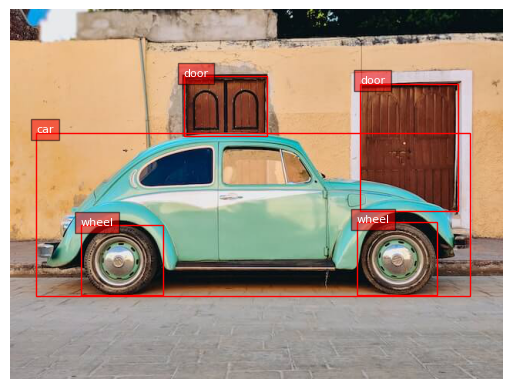

In [ ]:
plot_bbox(image, results['<OD>'])

### Dense region caption

Dense region caption results format:
{'\<DENSE_REGION_CAPTION>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['label1', 'label2', ...]}}

In [ ]:
task_prompt = '<DENSE_REGION_CAPTION>'
results = run_example(task_prompt)
print(results)

{'<DENSE_REGION_CAPTION>': {'bboxes': [[33.599998474121094, 159.59999084472656, 596.7999877929688, 371.7599792480469], [454.0799865722656, 96.72000122070312, 580.1599731445312, 261.8399963378906], [449.5999755859375, 276.239990234375, 554.5599975585938, 370.79998779296875], [91.83999633789062, 280.0799865722656, 198.0800018310547, 370.79998779296875], [224.95999145507812, 86.15999603271484, 333.7599792480469, 164.39999389648438]], 'labels': ['turquoise Volkswagen Beetle', 'wooden double doors with metal handles', 'wheel', 'wheel', 'door']}}


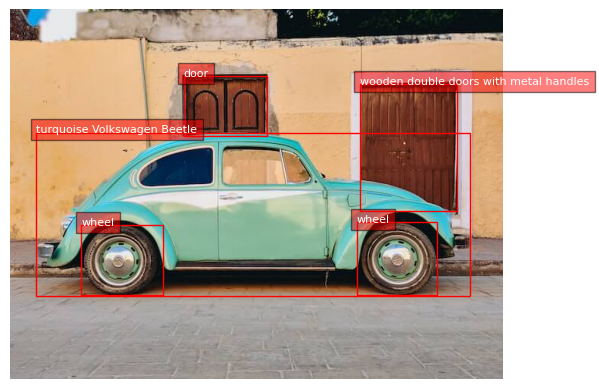

In [ ]:
plot_bbox(image, results['<DENSE_REGION_CAPTION>'])

### Region proposal

Region proposal results format:
{'<REGION_PROPOSAL>' : {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}

In [ ]:
task_prompt = '<REGION_PROPOSAL>'
results = run_example(task_prompt)
print(results)

{'<REGION_PROPOSAL>': {'bboxes': [[33.599998474121094, 159.59999084472656, 596.7999877929688, 371.7599792480469], [454.0799865722656, 96.23999786376953, 580.7999877929688, 261.8399963378906], [449.5999755859375, 276.239990234375, 554.5599975585938, 370.3199768066406], [91.19999694824219, 280.0799865722656, 198.0800018310547, 370.3199768066406], [224.3199920654297, 85.19999694824219, 333.7599792480469, 164.39999389648438], [274.239990234375, 178.8000030517578, 392.0, 228.239990234375], [165.44000244140625, 178.8000030517578, 264.6399841308594, 230.63999938964844]], 'labels': ['', '', '', '', '', '', '']}}


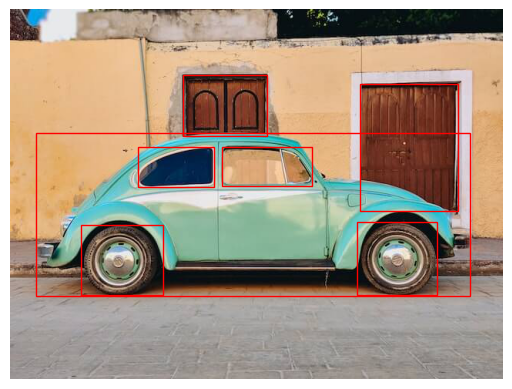

In [ ]:
plot_bbox(image, results['<REGION_PROPOSAL>'])

## Run pre-defined tasks that requires additional inputs

### Phrase Grounding
Phrase grounding results format:
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}

In [ ]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="A green car parked in front of a yellow building.")
print(results)

In [ ]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

### Referring expression segmentation

Referring expression segmentation results format:
{'\<REFERRING_EXPRESSION_SEGMENTATION>': {'Polygons': [[[polygon]], ...], 'labels': ['', '', ...]}}, one object is represented by a list of polygons. each polygon is [x1, y1, x2, y2, ..., xn, yn]

In [ ]:
task_prompt = '<REFERRING_EXPRESSION_SEGMENTATION>'
results = run_example(task_prompt, text_input="a green car")
print(results)

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np
colormap = ['blue','orange','green','purple','brown','pink','gray','olive','cyan','red',
            'lime','indigo','violet','aqua','magenta','coral','gold','tan','skyblue']
def draw_polygons(image, prediction, fill_mask=False):
    """
    Draws segmentation masks with polygons on an image.

    Parameters:
    - image_path: Path to the image file.
    - prediction: Dictionary containing 'polygons' and 'labels' keys.
                  'polygons' is a list of lists, each containing vertices of a polygon.
                  'labels' is a list of labels corresponding to each polygon.
    - fill_mask: Boolean indicating whether to fill the polygons with color.
    """
    # Load the image

    draw = ImageDraw.Draw(image)


    # Set up scale factor if needed (use 1 if not scaling)
    scale = 1

    # Iterate over polygons and labels
    for polygons, label in zip(prediction['polygons'], prediction['labels']):
        color = random.choice(colormap)
        fill_color = random.choice(colormap) if fill_mask else None

        for _polygon in polygons:
            _polygon = np.array(_polygon).reshape(-1, 2)
            if len(_polygon) < 3:
                print('Invalid polygon:', _polygon)
                continue

            _polygon = (_polygon * scale).reshape(-1).tolist()

            # Draw the polygon
            if fill_mask:
                draw.polygon(_polygon, outline=color, fill=fill_color)
            else:
                draw.polygon(_polygon, outline=color)

            # Draw the label text
            draw.text((_polygon[0] + 8, _polygon[1] + 2), label, fill=color)

    # Save or display the image
    #image.show()  # Display the image
    display(image)

In [ ]:
output_image = copy.deepcopy(image)
draw_polygons(output_image, results['<REFERRING_EXPRESSION_SEGMENTATION>'], fill_mask=True)

### region to segmentation


with additional region as inputs, format is '\<loc_x1>\<loc_y1>\<loc_x2>\<loc_y2>', [x1, y1, x2, y2] is the quantized corrdinates in [0, 999].

In [ ]:
task_prompt = '<REGION_TO_SEGMENTATION>'
results = run_example(task_prompt, text_input="<loc_702><loc_575><loc_866><loc_772>")
print(results)

In [ ]:
output_image = copy.deepcopy(image)
draw_polygons(output_image, results['<REGION_TO_SEGMENTATION>'], fill_mask=True)

### Open vocabulary detection

open vocabulary detection can detect both objects and ocr texts.

results format:

{ '\<OPEN_VOCABULARY_DETECTION>': {'bboxes': [[x1, y1, x2, y2], [x1, y1, x2, y2], ...]], 'bboxes_labels': ['label_1', 'label_2', ..],
'polygons': [[[x1, y1, x2, y2, ..., xn, yn], [x1, y1, ..., xn, yn]], ...], 'polygons_labels': ['label_1', 'label_2', ...]
}}

In [ ]:
task_prompt = '<OPEN_VOCABULARY_DETECTION>'
results = run_example(task_prompt, text_input="a green car")
print(results)

In [ ]:
def convert_to_od_format(data):
    """
    Converts a dictionary with 'bboxes' and 'bboxes_labels' into a dictionary with separate 'bboxes' and 'labels' keys.

    Parameters:
    - data: The input dictionary with 'bboxes', 'bboxes_labels', 'polygons', and 'polygons_labels' keys.

    Returns:
    - A dictionary with 'bboxes' and 'labels' keys formatted for object detection results.
    """
    # Extract bounding boxes and labels
    bboxes = data.get('bboxes', [])
    labels = data.get('bboxes_labels', [])

    # Construct the output format
    od_results = {
        'bboxes': bboxes,
        'labels': labels
    }

    return od_results

In [ ]:
bbox_results  = convert_to_od_format(results['<OPEN_VOCABULARY_DETECTION>'])

In [ ]:
plot_bbox(image, bbox_results)

### region to texts

In [ ]:
task_prompt = '<REGION_TO_CATEGORY>'
results = run_example(task_prompt, text_input="<loc_52><loc_332><loc_932><loc_774>")
print(results)

In [ ]:
task_prompt = '<REGION_TO_DESCRIPTION>'
results = run_example(task_prompt, text_input="<loc_52><loc_332><loc_932><loc_774>")
print(results)

## ocr related tasks

In [ ]:
url = "http://ecx.images-amazon.com/images/I/51UUzBDAMsL.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')

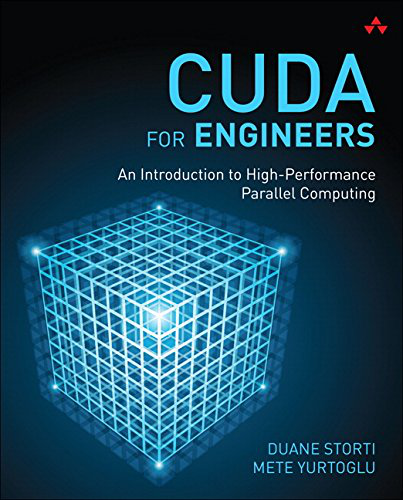

In [ ]:
image

In [ ]:
task_prompt = '<OCR>'
run_example(task_prompt)

{'<OCR>': 'CUDAFOR ENGINEERSAn Introduction to High-PerformanceParallel ComputingDUANE STORTIMETE YURTOGLU'}

In [ ]:
task_prompt = '<OCR_WITH_REGION>'
results = run_example(task_prompt)
print(results)
# ocr results format
# {'OCR_WITH_REGION': {'quad_boxes': [[x1, y1, x2, y2, x3, y3, x4, y4], ...], 'labels': ['text1', ...]}}

{'<OCR_WITH_REGION>': {'quad_boxes': [[167.0435028076172, 50.25, 376.20050048828125, 50.25, 376.20050048828125, 114.75, 167.0435028076172, 114.75], [144.8784942626953, 120.75, 375.3945007324219, 120.75, 375.3945007324219, 149.25, 144.8784942626953, 149.25], [115.86249542236328, 165.25, 376.20050048828125, 166.25, 376.20050048828125, 184.25, 115.86249542236328, 183.25], [239.9864959716797, 184.25, 376.20050048828125, 186.25, 376.20050048828125, 204.25, 239.9864959716797, 202.25], [266.1814880371094, 441.25, 376.20050048828125, 441.25, 376.20050048828125, 456.25, 266.1814880371094, 456.25], [252.0764923095703, 460.25, 376.20050048828125, 460.25, 376.20050048828125, 475.25, 252.0764923095703, 475.25]], 'labels': ['</s>CUDA', 'FOR ENGINEERS', 'An Introduction to High-Performance', 'Parallel Computing', 'DUANE STORTI', 'METE YURTOGLU']}}


In [ ]:
def draw_ocr_bboxes(image, prediction, scale=1):
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)
        draw.text((new_box[0]+8, new_box[1]+2),
                    "{}".format(label),
                    align="right",

                    fill=color)

    display(image)

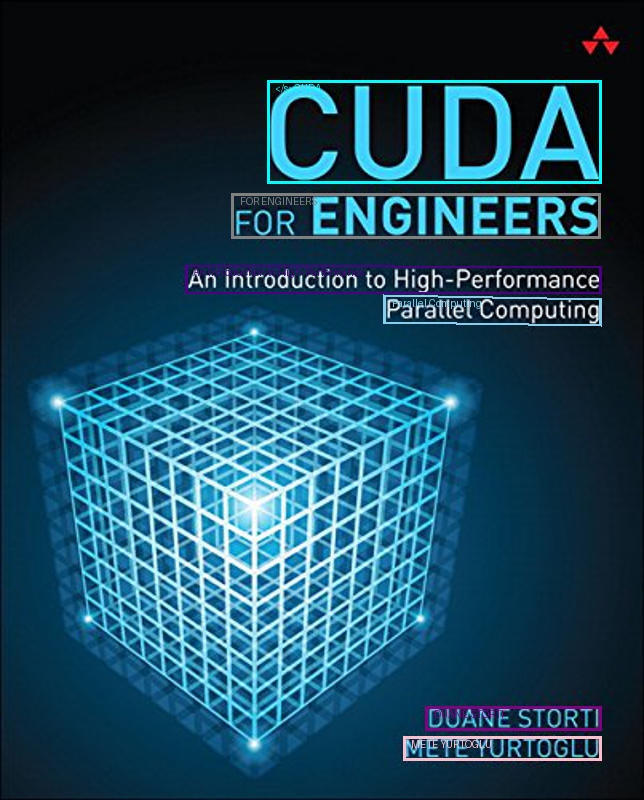

In [ ]:
output_image = copy.deepcopy(image)
w, h = output_image.size
scale = 800 / max(w, h)
new_output_image = output_image.resize((int(w * scale), int(h * scale)))
draw_ocr_bboxes(new_output_image, results['<OCR_WITH_REGION>'], scale=scale)

## Cascaded tasks

### Caption + Phrase Grounding

results format:

{
 '\<CAPTION': pure_text,
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}
}

In [ ]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)

In [ ]:
task_prompt = '<CAPTION>'
results = run_example(task_prompt)
text_input = results[task_prompt]
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input)
results['<CAPTION>'] = text_input

In [ ]:
results

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[34.23999786376953,
    159.1199951171875,
    582.0800170898438,
    374.6399841308594],
   [1.5999999046325684,
    4.079999923706055,
    639.0399780273438,
    305.03997802734375]],
  'labels': ['A green car', 'a yellow building']},
 '<CAPTION>': 'A green car parked in front of a yellow building.'}

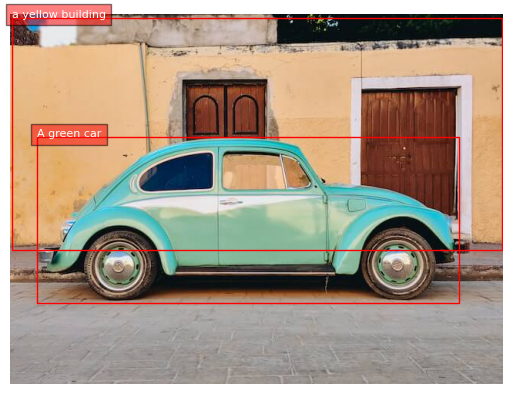

In [ ]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

### Detailed Caption + Phrase Grounding

results format:

{
 '\<DETAILED_CAPTION': pure_text,
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}
}

In [ ]:
task_prompt = '<DETAILED_CAPTION>'
results = run_example(task_prompt)
text_input = results[task_prompt]
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input)
results['<DETAILED_CAPTION>'] = text_input

In [ ]:
results

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[33.599998474121094,
    158.63999938964844,
    582.719970703125,
    375.1199951171875],
   [1.5999999046325684, 5.039999961853027, 639.0399780273438, 306.0],
   [452.79998779296875,
    94.31999969482422,
    582.0800170898438,
    265.67999267578125],
   [222.39999389648438,
    84.23999786376953,
    335.03997802734375,
    167.27999877929688],
   [2.240000009536743,
    1.1999999284744263,
    639.0399780273438,
    43.91999816894531],
   [343.3599853515625,
    1.1999999284744263,
    639.0399780273438,
    40.55999755859375],
   [2.240000009536743,
    1.1999999284744263,
    638.3999633789062,
    43.91999816894531],
   [18.239999771118164,
    1.1999999284744263,
    104.63999938964844,
    45.36000061035156]],
  'labels': ['a blue Volkswagen Beetle',
   'a yellow building',
   'brown doors',
   'brown doors',
   'trees',
   'trees',
   'a clear blue sky',
   'a clear blue sky']},
 '<DETAILED_CAPTION>': 'The image shows a blue Vol

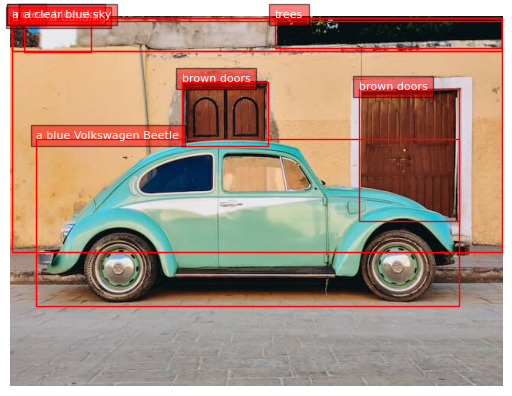

In [ ]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

### More Detailed Caption + Phrase Grounding

results format:

{
 '\<MORE_DETAILED_CAPTION': pure_text,
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}
}

In [ ]:
task_prompt = '<MORE_DETAILED_CAPTION>'
results = run_example(task_prompt)
text_input = results[task_prompt]
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input)
results['<MORE_DETAILED_CAPTION>'] = text_input

In [ ]:
results

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[35.52000045776367,
    157.67999267578125,
    581.4400024414062,
    372.7200012207031],
   [1.5999999046325684,
    340.0799865722656,
    639.0399780273438,
    479.2799987792969],
   [454.0799865722656,
    93.83999633789062,
    580.7999877929688,
    263.2799987792969],
   [223.67999267578125,
    84.23999786376953,
    333.7599792480469,
    163.9199981689453],
   [36.79999923706055,
    157.67999267578125,
    580.1599731445312,
    372.239990234375],
   [454.0799865722656,
    93.83999633789062,
    581.4400024414062,
    263.2799987792969],
   [223.67999267578125,
    84.72000122070312,
    333.7599792480469,
    163.9199981689453],
   [164.16000366210938,
    177.36000061035156,
    265.2799987792969,
    232.0800018310547],
   [2.879999876022339,
    4.559999942779541,
    639.0399780273438,
    301.1999816894531],
   [19.520000457763672, 1.1999999284744263, 639.0399780273438, 42.0],
   [20.15999984741211,
    0.719999969005584

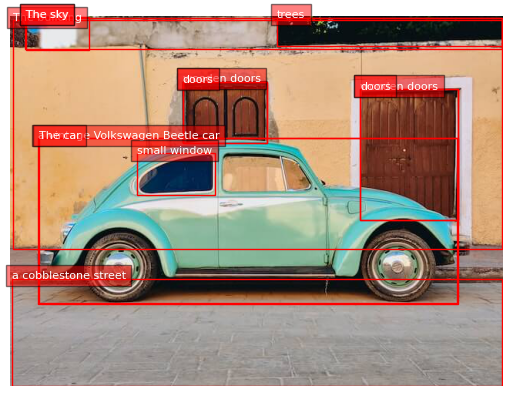

In [ ]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])